In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


#Load the dataset
df = pd.read_csv("loan.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [2]:
#Drop all the columns, which has all the null values
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [3]:
# filtering the all null value rows
df = df[df.isnull().sum(axis=1) != 57]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [4]:
#Remove the columns, which contains information unrelated to the approval of loan
df = df.drop(columns=[
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'out_prncp',
    'out_prncp_inv',
    'url',
    'desc',
    'title',
    'zip_code',
    'delinq_2yrs',
    'member_id',
    'id',
    'emp_title',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'collection_recovery_fee',
    'recoveries'
])

In [5]:
# impute the values and remove unwanted characters from the other columns

df.revol_util = df.revol_util.fillna(0)
df["term_value"] =  df.term.apply(lambda x: float(x.replace("months", "")))
df.int_rate =  df.int_rate.apply(lambda x: float(x.replace("%", "")))
df.revol_util = df.revol_util.apply(lambda x: 0 if x == 0 else float(x.replace('%', '')))
# df.last_credit_pull_d
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
# df.issue_d
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

# Calculate the month and year from issue date
df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   39717 non-null  int64         
 1   funded_amnt                 39717 non-null  int64         
 2   funded_amnt_inv             39717 non-null  float64       
 3   term                        39717 non-null  object        
 4   int_rate                    39717 non-null  float64       
 5   installment                 39717 non-null  float64       
 6   grade                       39717 non-null  object        
 7   sub_grade                   39717 non-null  object        
 8   emp_length                  38642 non-null  object        
 9   home_ownership              39717 non-null  object        
 10  annual_inc                  39717 non-null  float64       
 11  verification_status         39717 non-null  object    

In [7]:
#Find if any duplicates are present
duplicate_rows = df[df.duplicated()]

In [8]:
duplicate_rows

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_value,issue_year,issue_month


In [9]:
# Find the columns, which have just 1 common value and remove them

df.pymnt_plan.value_counts()


pymnt_plan
n    39717
Name: count, dtype: int64

In [10]:
# Find the columns, which have just 1 common value and remove them

df.initial_list_status.value_counts()

initial_list_status
f    39717
Name: count, dtype: int64

In [11]:
# Find the columns, which have just 1 common value and remove them


df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [12]:
# Find the columns, which have just 1 common value and remove them

df.policy_code.value_counts() 

policy_code
1    39717
Name: count, dtype: int64

In [13]:
# Find the columns, which have just 1 common value and remove them

df.application_type.value_counts() 


application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [14]:
# Find the columns, which have just 1 common value and remove them

df.acc_now_delinq.value_counts()


acc_now_delinq
0    39717
Name: count, dtype: int64

In [15]:
# Find the columns, which have just 1 common value and remove them

df.chargeoff_within_12_mths.value_counts()


chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [16]:
# Find the columns, which have just 1 common value and remove them

df.delinq_amnt.value_counts()


delinq_amnt
0    39717
Name: count, dtype: int64

In [17]:
# Find the columns, which have just 1 common value and remove them

df.tax_liens.value_counts()


tax_liens
0.0    39678
Name: count, dtype: int64

In [18]:
df = df.drop(columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',  'application_type', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens' ])

In [19]:
# Check the null percentage in all the columns
df.isnull().sum()* 100 / len(df)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
last_credit_pull_d         0.005036
pub_rec_bankruptcies       1

In [20]:
#Remove the columns which has very high percentage of null values
df = df.drop(columns=['mths_since_last_record', 'mths_since_last_delinq'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [22]:
#Now check the which columns has how much null values
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
term_value                 0
issue_year                 0
issue_month                0
dtype: int64

In [23]:
#Impute some of the null values with proper values
df.emp_length =df.emp_length.fillna(0)

In [24]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    697
term_value                0
issue_year                0
issue_month               0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [26]:
df.pub_rec_bankruptcies.value_counts()


pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [27]:
df.pub_rec.value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [28]:
# Since the above 2 columns has almost all the values as zero, hence we will drop these columns
df = df.drop(columns=['pub_rec_bankruptcies', 'pub_rec'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            39717 non-null  int64         
 1   funded_amnt          39717 non-null  int64         
 2   funded_amnt_inv      39717 non-null  float64       
 3   term                 39717 non-null  object        
 4   int_rate             39717 non-null  float64       
 5   installment          39717 non-null  float64       
 6   grade                39717 non-null  object        
 7   sub_grade            39717 non-null  object        
 8   emp_length           39717 non-null  object        
 9   home_ownership       39717 non-null  object        
 10  annual_inc           39717 non-null  float64       
 11  verification_status  39717 non-null  object        
 12  issue_d              39717 non-null  datetime64[ns]
 13  loan_status          39717 non-

In [30]:
#Again check the number null value columns
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     2
term_value             0
issue_year             0
issue_month            0
dtype: int64

In [31]:
# Function to return the numerical values of employee tenure
def calculate_emp_length(term):
    if term == '< 1 ' or term == 0:
        return 0
    elif term == '10+ ':
        return 10
    else:
        return int(term)

In [32]:
df["emp_length"] = df.emp_length.astype(str)

df.emp_length = df.emp_length.apply(lambda x: x.replace("years", "").replace("year", ""))

In [33]:
df.emp_length.value_counts()

emp_length
10+     8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
0       1075
Name: count, dtype: int64

In [34]:
df.emp_length = df.emp_length.apply(calculate_emp_length)

In [35]:
# For better understanding, we are converting the employee tenure into experience level
def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'

df['exp_level'] = df.emp_length.apply(lambda x : experience_level(int(x)))
df['exp_level'].value_counts()

exp_level
Junior        17381
Specialist    11616
Senior        10720
Name: count, dtype: int64

In [36]:
# Again check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            39717 non-null  int64         
 1   funded_amnt          39717 non-null  int64         
 2   funded_amnt_inv      39717 non-null  float64       
 3   term                 39717 non-null  object        
 4   int_rate             39717 non-null  float64       
 5   installment          39717 non-null  float64       
 6   grade                39717 non-null  object        
 7   sub_grade            39717 non-null  object        
 8   emp_length           39717 non-null  int64         
 9   home_ownership       39717 non-null  object        
 10  annual_inc           39717 non-null  float64       
 11  verification_status  39717 non-null  object        
 12  issue_d              39717 non-null  datetime64[ns]
 13  loan_status          39717 non-

In [37]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [38]:
#Since we do not want to analyze the current loan status accounts, hence removing the respective rows
df = df[df.loan_status != "Current"]

In [39]:
# Reset the index
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  object        
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_length           38577 non-null  int64         
 9   home_ownership       38577 non-null  object        
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  object        
 12  issue_d              38577 non-null  datetime64[ns]
 13  loan_status          38577 non-

In [40]:
#Accumulating type of verification as either verified or not
df.verification_status = df.verification_status.apply(lambda x: 'Not Verified' if x == 'Not Verified' else 'Verified')

In [41]:
df.verification_status.value_counts()

verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

In [42]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,term_value,issue_year,issue_month,exp_level
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,1,3,13648,83.7,9,2016-05-01,36.0,2011,12,Specialist
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,5,3,1687,9.4,4,2013-09-01,60.0,2011,12,Junior
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,2,2,2956,98.5,10,2016-05-01,36.0,2011,12,Specialist
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,1,10,5598,21.0,37,2016-04-01,36.0,2011,12,Specialist
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,3,9,7963,28.3,12,2016-01-01,36.0,2011,12,Junior


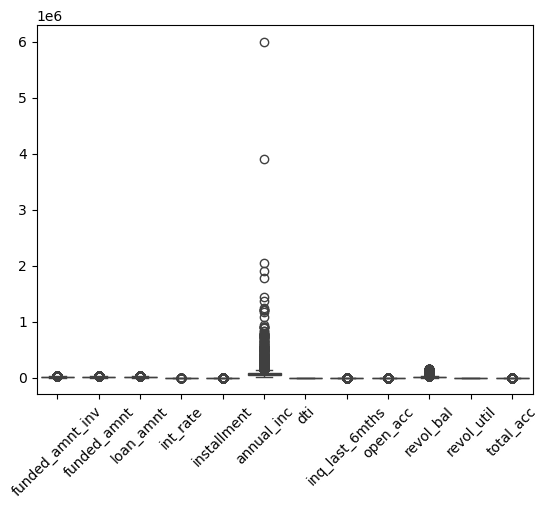

In [43]:
# Study for outliers for the quantitative columns
sns.boxplot([
    df.funded_amnt_inv, 
    df.funded_amnt, 
    df.loan_amnt, 
    df.int_rate, 
    df.installment, 
    df.annual_inc, 
    df.dti, 
    df.inq_last_6mths, 
    df.open_acc,
    df.revol_bal,
    df.revol_util,
    df.total_acc])
plt.xticks(rotation=45)
plt.show()

In [44]:
# Annual Income seems to have major outliers, hence we will try to examine them first
df.annual_inc.quantile([0.5, 0.75,0.80, 0.90, 0.95, 0.99])


0.50     58868.0
0.75     82000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [45]:
#From above analysis, we see a very high jump after 90 percentile, hence removing those rows
df = df[df.annual_inc < df.annual_inc.quantile(0.90)]

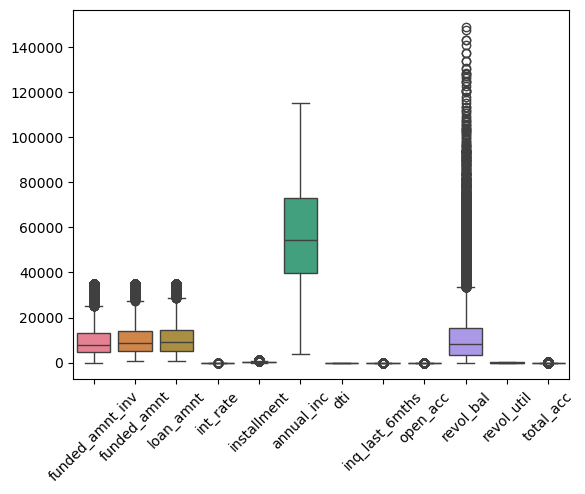

In [46]:
# Study for outliers for the quantitative columns
sns.boxplot([
    df.funded_amnt_inv, 
    df.funded_amnt, 
    df.loan_amnt, 
    df.int_rate, 
    df.installment, 
    df.annual_inc, 
    df.dti, 
    df.inq_last_6mths, 
    df.open_acc,
    df.revol_bal,
    df.revol_util,
    df.total_acc])
plt.xticks(rotation=45)
plt.show()

In [47]:


df.revol_bal.quantile([0.5, 0.75,0.80, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.97, 0.99])


0.50     8179.00
0.75    15432.00
0.80    17673.20
0.90    25189.00
0.91    26424.64
0.92    27786.00
0.93    29257.04
0.94    31364.80
0.95    33878.00
0.97    41297.44
0.99    60685.20
Name: revol_bal, dtype: float64

In [48]:
#From above analysis, we see a very high jump after 95 percentile, hence removing those rows
df = df[df.revol_bal < df.revol_bal.quantile(0.95)]

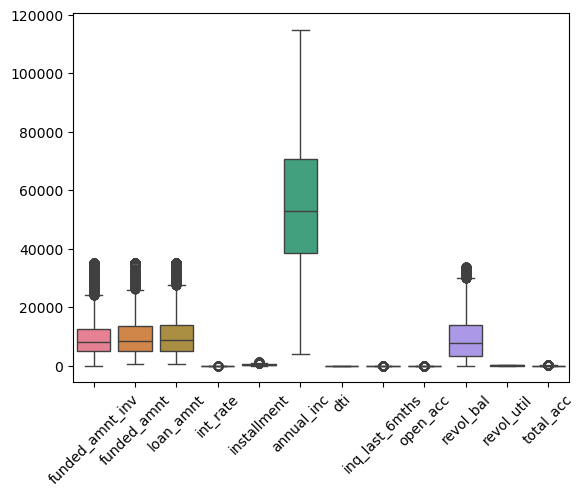

In [49]:
# Study for outliers for the quantitative columns
sns.boxplot([
    df.funded_amnt_inv, 
    df.funded_amnt, 
    df.loan_amnt, 
    df.int_rate, 
    df.installment, 
    df.annual_inc, 
    df.dti, 
    df.inq_last_6mths, 
    df.open_acc,
    df.revol_bal,
    df.revol_util,
    df.total_acc])
plt.xticks(rotation=45)
plt.show()

In [50]:
#Marking NONE as Other for home
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

### Univariate analysis


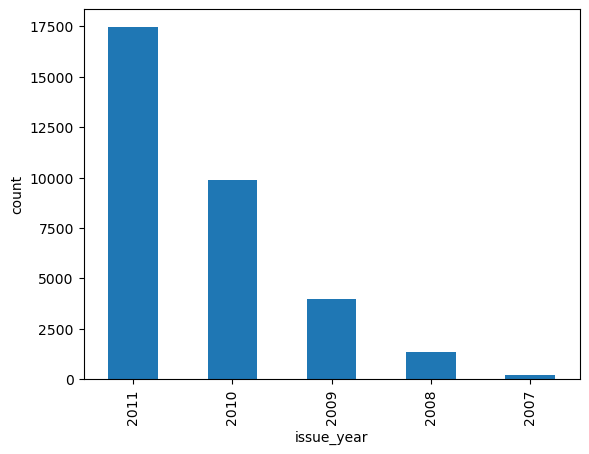

In [51]:
df.issue_year.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

The number of borrowers are increasing over the years.


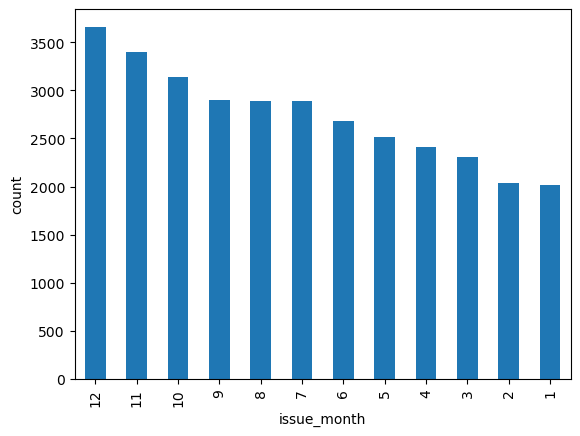

In [52]:
df.issue_month.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

The number of borrowers tend to take loan more at the end of the year, maybe due to
1. Number of festivals mainly occurs at the end of the year.
2. There are a lot of year end sales at the end of the year, hence people need a lot of money.

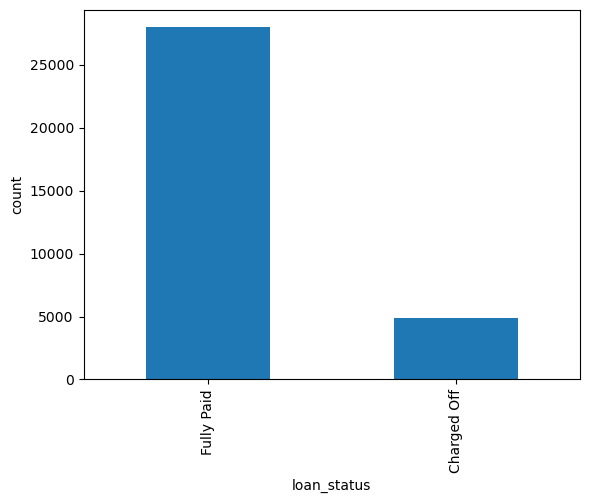

In [53]:
df.loan_status.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

Overall total number of borrowers who took the loan and paid it off is extensively greater than charged off borrowers

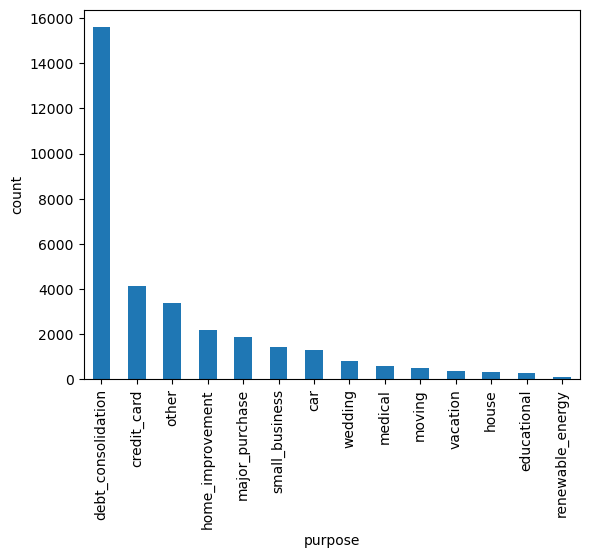

In [54]:
df.purpose .value_counts().plot.bar()
plt.ylabel("count")
plt.show()

It seems that people who take new loans mainly to pay off the old loans is very high in volume

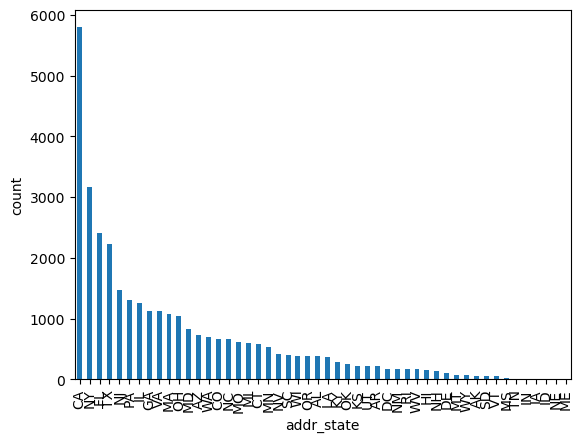

In [55]:
df.addr_state.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

CA state has more number of borrowers

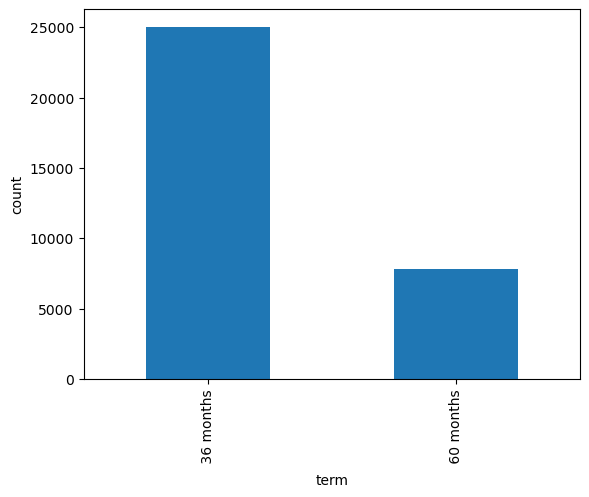

In [56]:
df.term.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

There is a high number of borrowers who took 3 years duration of loan as compared to 5 years duration

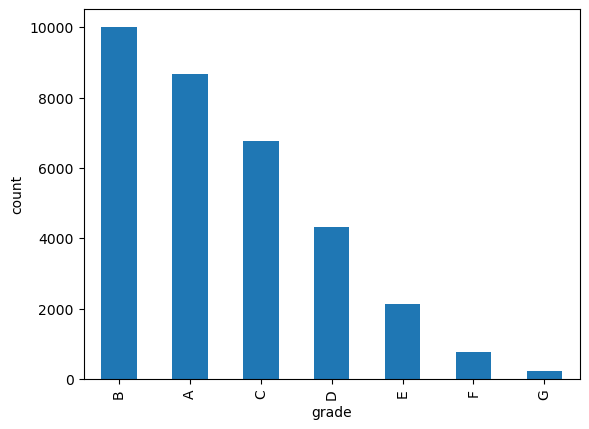

In [57]:
df.grade.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

B grade borrowers take loan more than any other grade

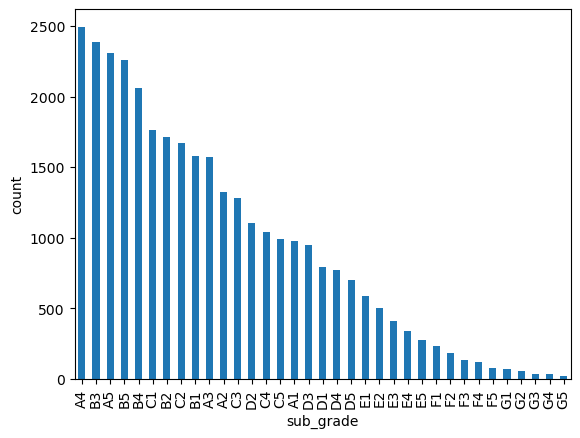

In [58]:
df.sub_grade.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

A4 grade borrowers take loan more than any other sub grade

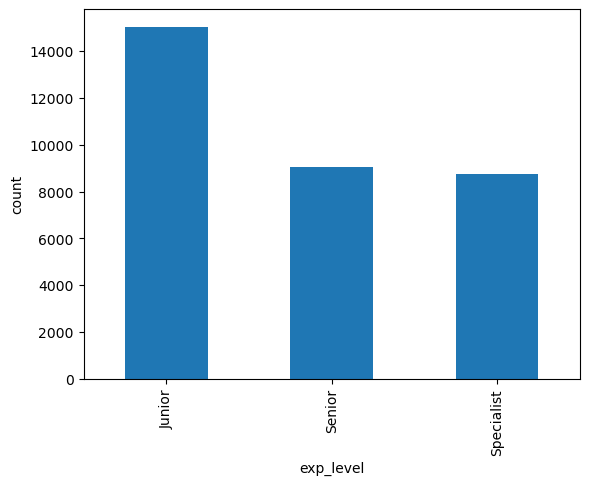

In [59]:
df.exp_level.value_counts().plot.bar()
plt.ylabel("count")
plt.show()

It seems Junior employees tend to take loan more.

### Creating the derived columns for the further analysis

In [60]:

def double_compare(column, hue=None, xlabel="", ylabel=""):
    
    fig, ax = plt.subplots(figsize=(25, 15))
    width = len(df.purpose.unique()) + 10
    fig.set_size_inches(width , 8)
    ax = sns.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.1, p.get_height()+20))  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [61]:
df.loan_amnt.describe()
def create_buckets(x):
    if x <= 5000:
        return 'Low (0 - 5000)'
    elif (x >5000) and (x <= 9000):
        return 'Moderate (5001 - 9000)'    
    elif (x >9000) and (x <= 14400):
        return 'High (9001 - 14400)'
    else:
        return 'Very High (above 14401)'
    
df["loan_amnt_bucket"] = df.loan_amnt.apply(lambda x: create_buckets(x))

In [62]:

df["loan_amnt_bucket"].value_counts()

loan_amnt_bucket
Low (0 - 5000)             8827
Moderate (5001 - 9000)     8282
High (9001 - 14400)        8098
Very High (above 14401)    7640
Name: count, dtype: int64

In [63]:

df.funded_amnt.describe()
def create_bucket(x):
    if x <= 5200:
        return 'Low (0 - 5200)'
    elif (x >5200) and (x <= 9550):
        return 'Moderate (5201 - 9550)'    
    elif (x >9550) and (x <= 15000):
        return 'High (9551 - 15000)'
    else:
        return 'Very High (above 15000)'
    
df["funded_amnt_bucket"] = df.funded_amnt.apply(lambda x: create_bucket(x))

In [64]:

df["funded_amnt_bucket"].value_counts()

funded_amnt_bucket
High (9551 - 15000)        9543
Low (0 - 5200)             9040
Moderate (5201 - 9550)     8642
Very High (above 15000)    5622
Name: count, dtype: int64

In [65]:
df.funded_amnt_inv.describe()
def create_bucket(x):
    if x <= 5000:
        return 'Low (0 - 5000)'
    elif (x >5000) and (x <= 8733.44):
        return 'Moderate (5001 - 8733.44)'    
    elif (x >8733.44) and (x <= 14000):
        return 'High (8733.45 - 14000)'
    else:
        return 'Very High (above 14000)'
    
df["funded_amnt_inv_bucket"] = df.funded_amnt_inv.apply(lambda x: create_bucket(x))

In [66]:
df.funded_amnt_inv_bucket.value_counts()

funded_amnt_inv_bucket
Low (0 - 5000)               9867
High (8733.45 - 14000)       8383
Moderate (5001 - 8733.44)    7738
Very High (above 14000)      6859
Name: count, dtype: int64

In [67]:
df.int_rate.describe()
def create_bucket(x):
    if x <= 8.94:
        return 'Low (0 - 8.9)'
    elif (x >8.94) and (x <= 11.71):
        return 'Moderate (9 - 11.7)'    
    elif (x >11.71) and (x <= 14.38):
        return 'High (11.8 - 14.38)'
    else:
        return 'Very High (above 14.38)'
    
df["int_rate_bucket"] = df.int_rate.apply(lambda x: create_bucket(x))

In [68]:
df.installment.describe()
def create_bucket(x):
    if x <= 165.74:
        return 'Low'
    elif (x >165.74) and (x <= 277.86):
        return 'Moderate'    
    elif (x >277.86) and (x <= 425.55):
        return 'High'
    else:
        return 'Very High'
    
df["installment_bucket"] = df.installment.apply(lambda x: create_bucket(x))

In [69]:
df.annual_inc.describe()
def create_bucket(x):
    if x <= 4.000000e+04:
        return 'Low'
    elif (x >4.000000e+04) and (x <= 5.886800e+04):
        return 'Moderate'    
    elif (x >5.886800e+04) and (x <= 8.200000e+04):
        return 'High'
    else:
        return 'Very High'
    
df["annual_inc_bucket"] = df.annual_inc.apply(lambda x: create_bucket(x))

In [70]:
df.annual_inc_bucket.value_counts()

annual_inc_bucket
Low          9671
Moderate     9402
High         9059
Very High    4715
Name: count, dtype: int64

In [71]:
df.dti.describe()
def create_bucket(x):
    if x <= 8.13:
        return 'Low'
    elif (x >8.13) and (x <= 13.37):
        return 'Moderate'    
    elif (x > 13.37) and (x <= 18.56):
        return 'High'
    else:
        return 'Very High'
    
df["dti_bucket"] = df.dti.apply(lambda x: create_bucket(x))

In [72]:
df.revol_bal.describe()
def create_bucket(x):
    if x <= 3650:
        return 'Low'
    elif (x >3650) and (x <= 8762):
        return 'Moderate'    
    elif (x > 8762) and (x <= 16912):
        return 'High'
    else:
        return 'Very High'
    
df["revol_bal_bucket"] = df.revol_bal.apply(lambda x: create_bucket(x))

In [73]:
df.revol_util.describe()
def create_bucket(x):
    if x <= 25.10:
        return 'Low'
    elif (x >25.10) and (x <= 49.0):
        return 'Moderate'    
    elif (x > 49.0) and (x <= 72.2):
        return 'High'
    else:
        return 'Very High'
    
df["revol_util_bucket"] = df.revol_util.apply(lambda x: create_bucket(x))

In [74]:
df.total_acc.describe()
def create_bucket(x):
    if x <= 13:
        return 'Low'
    elif (x > 13) and (x <= 20):
        return 'Moderate'    
    elif (x > 20) and (x <= 29):
        return 'High'
    else:
        return 'Very High'
    
df["total_acc_bucket"] = df.total_acc.apply(lambda x: create_bucket(x))

Outlier filters have been applied till now


### Bivariate analysis


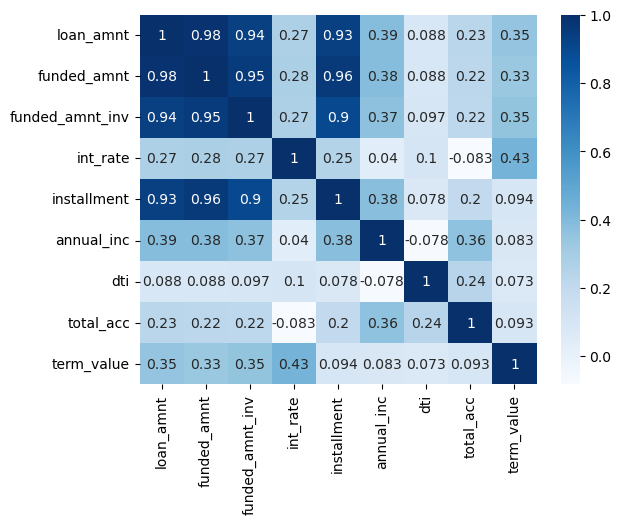

In [75]:
#Making Correlation analysis for the quantitative variables
newdf = df[["loan_amnt", "funded_amnt","funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "total_acc", "term_value"]]
corr = newdf.corr()
sns.heatmap(corr, cmap = "Blues", annot=True)
plt.show()

#### Home Ownership analysis


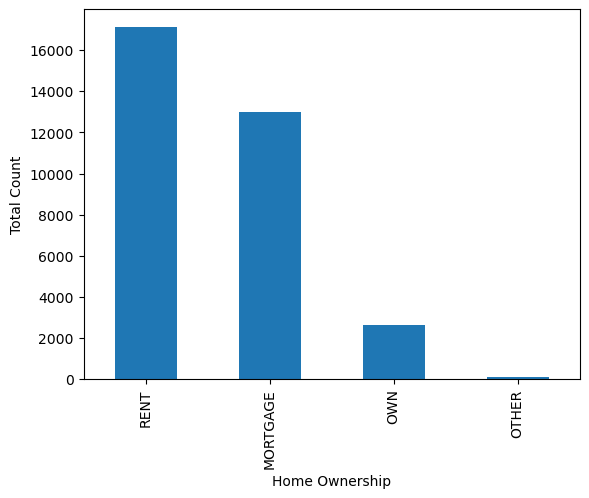

In [76]:
#Univariate for home ownership
df.home_ownership.value_counts().plot.bar()
plt.xlabel("Home Ownership")
plt.ylabel("Total Count")
plt.show()

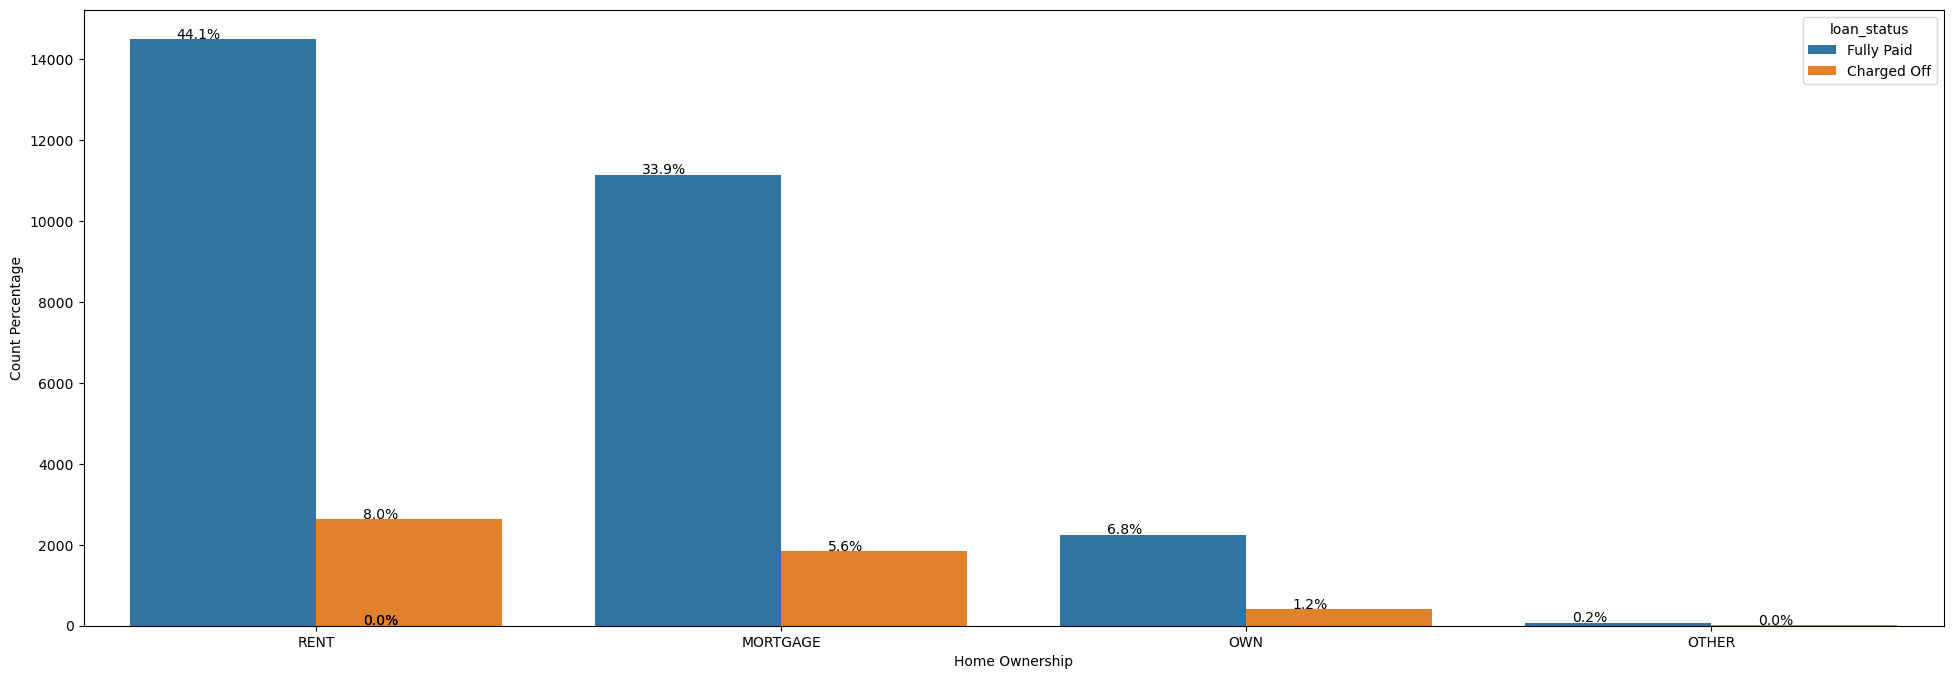

In [77]:
#Bivariate for home ownership with loan status
double_compare("home_ownership", "loan_status", "Home Ownership", "Count Percentage")

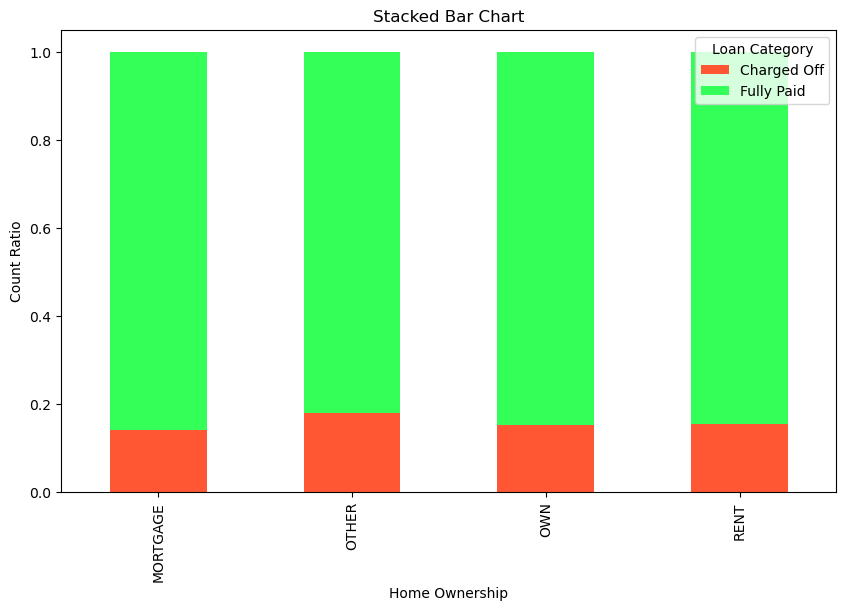

In [78]:
#Bivariate for home ownership with loan status

counts = df.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Home Ownership')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

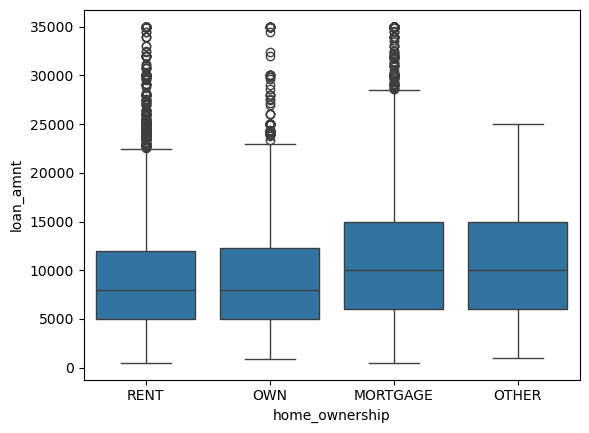

In [79]:
sns.boxplot(x = 'home_ownership', y = 'loan_amnt', data=df)

<Axes: xlabel='home_ownership', ylabel='int_rate'>

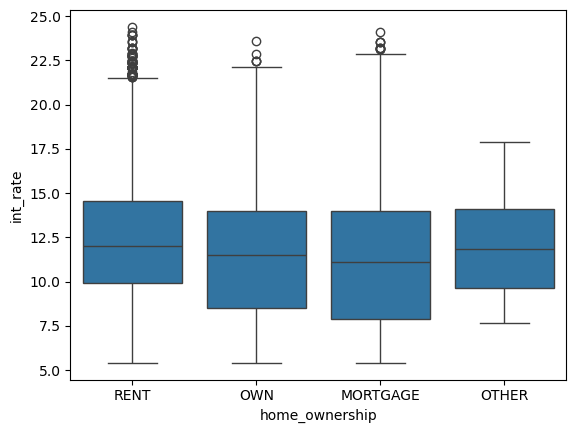

In [80]:
sns.boxplot(x = 'home_ownership', y = 'int_rate', data=df)

It seems, that Mortgage and rent housing type borrowers are riskiest. They are also taking comparatively more amount of loan.


#### Verification Status analysis

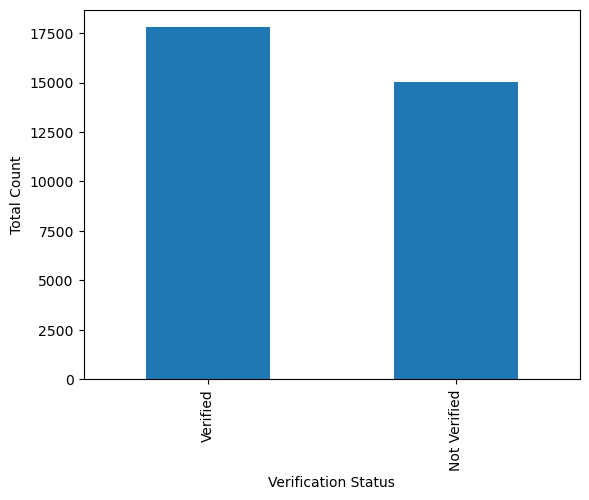

In [81]:
df.verification_status.value_counts().plot.bar()
plt.xlabel("Verification Status")
plt.ylabel("Total Count")
plt.show()

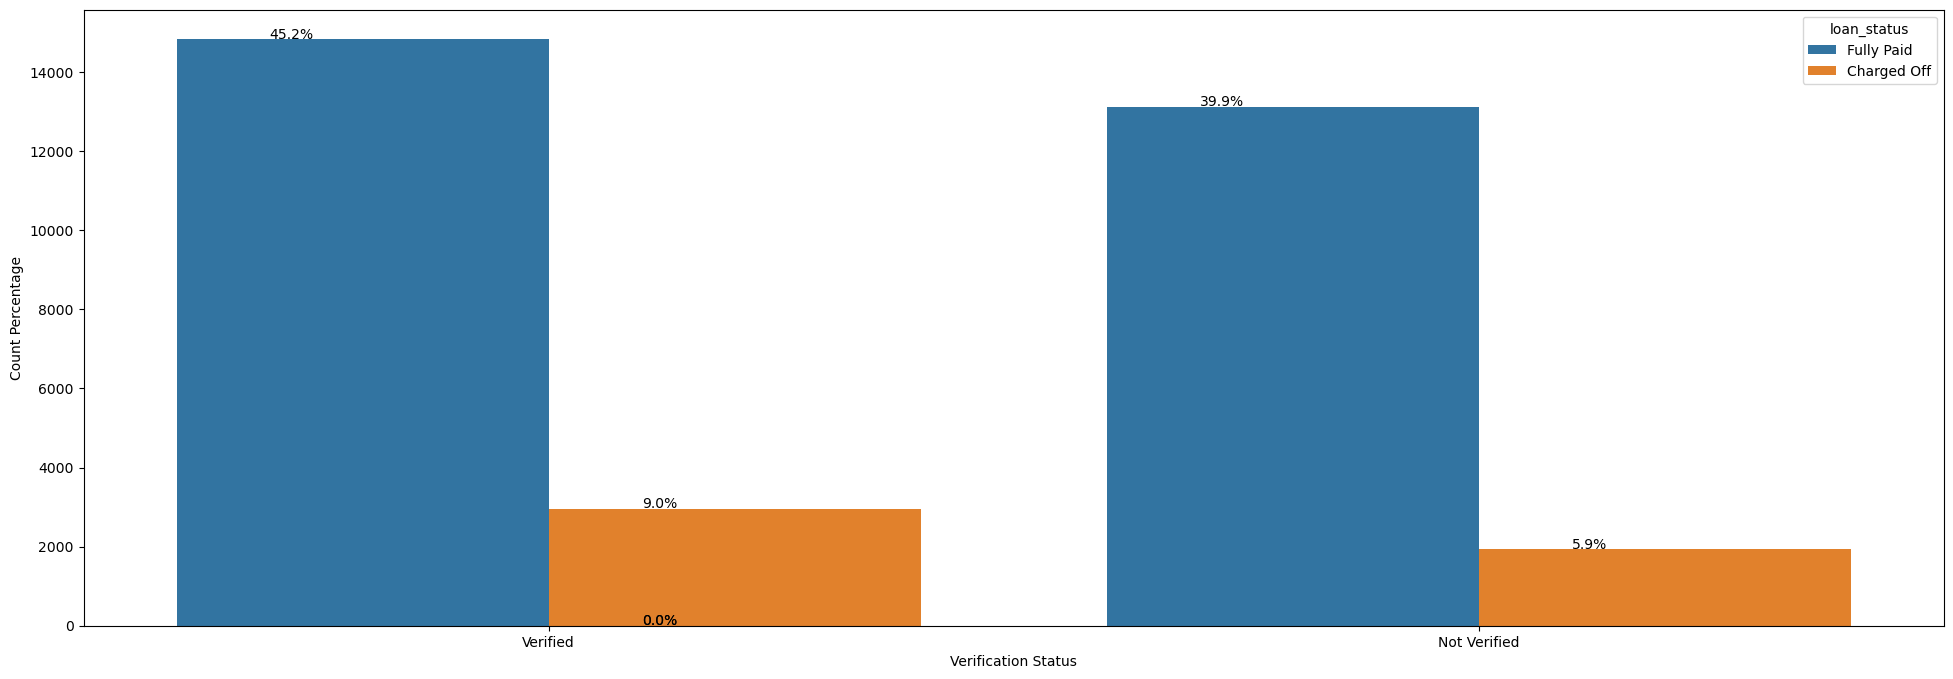

In [82]:
#Bivariate for verification status with loan status

double_compare("verification_status", "loan_status", "Verification Status", "Count Percentage")

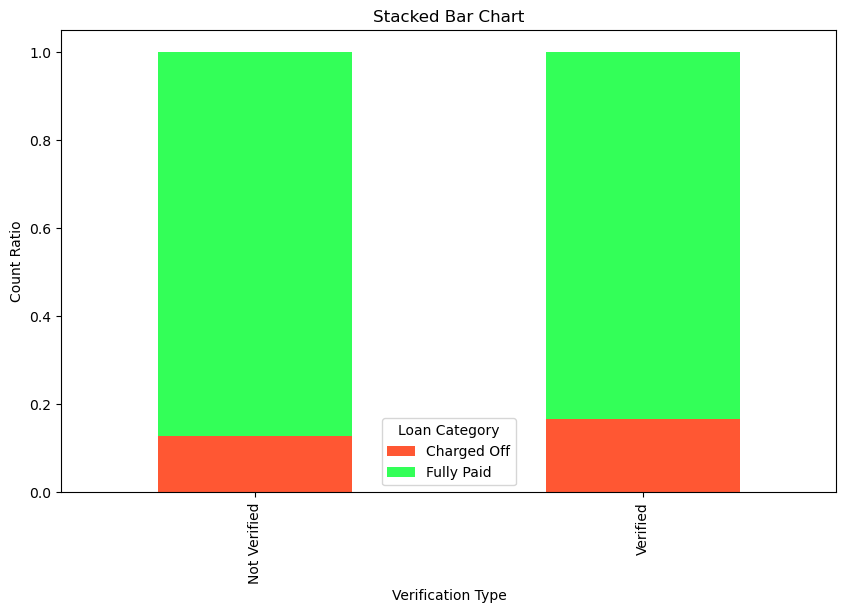

In [83]:
counts = df.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Verification Type')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

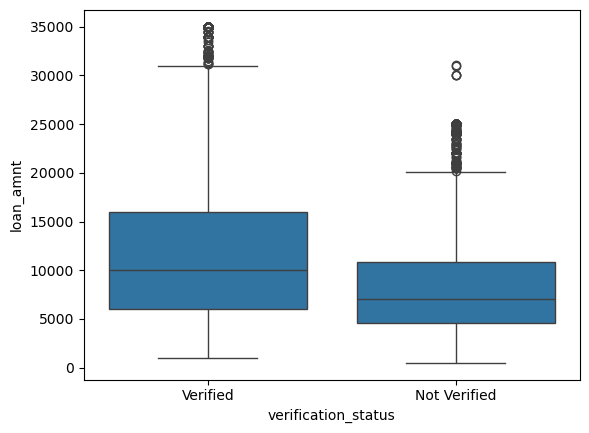

In [84]:

sns.boxplot(x = 'verification_status', y = 'loan_amnt', data=df)

<Axes: xlabel='verification_status', ylabel='int_rate'>

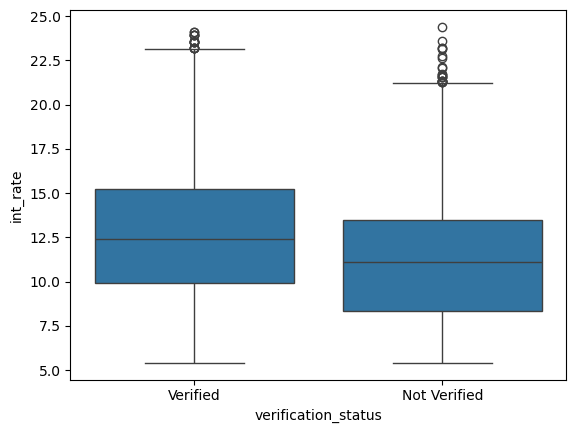

In [85]:

sns.boxplot(x = 'verification_status', y = 'int_rate', data=df)

It seems that the verified borrowers are taking higher loan amounts and are still being charged off, which is of high risk


#### Purpose analysis

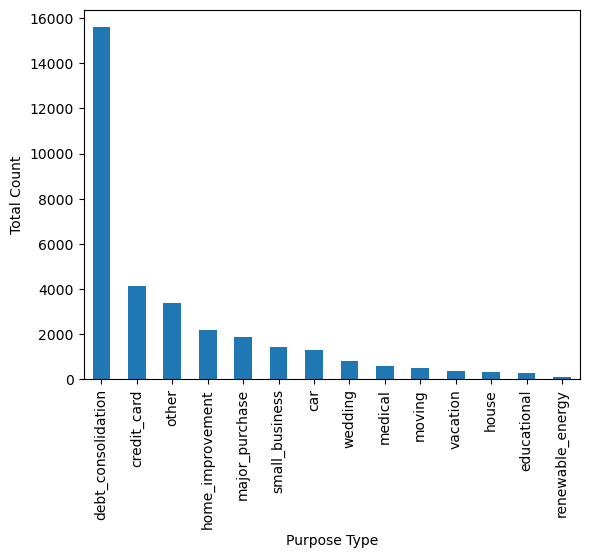

In [86]:
#Univariate and Bivariate analysis for Purpose
df.purpose.value_counts().plot.bar()
plt.xlabel("Purpose Type")
plt.ylabel("Total Count")
plt.show()

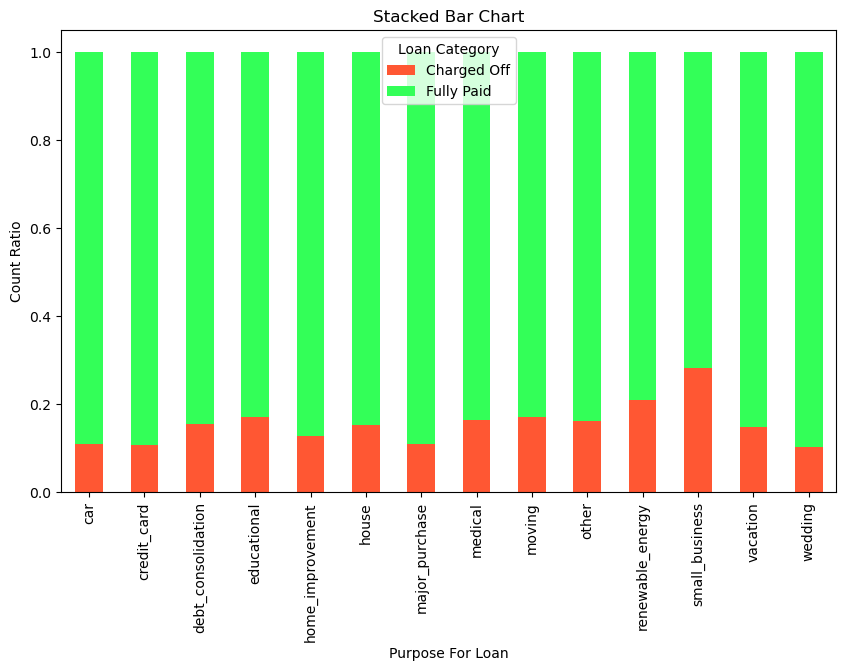

In [87]:
counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Purpose For Loan')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()

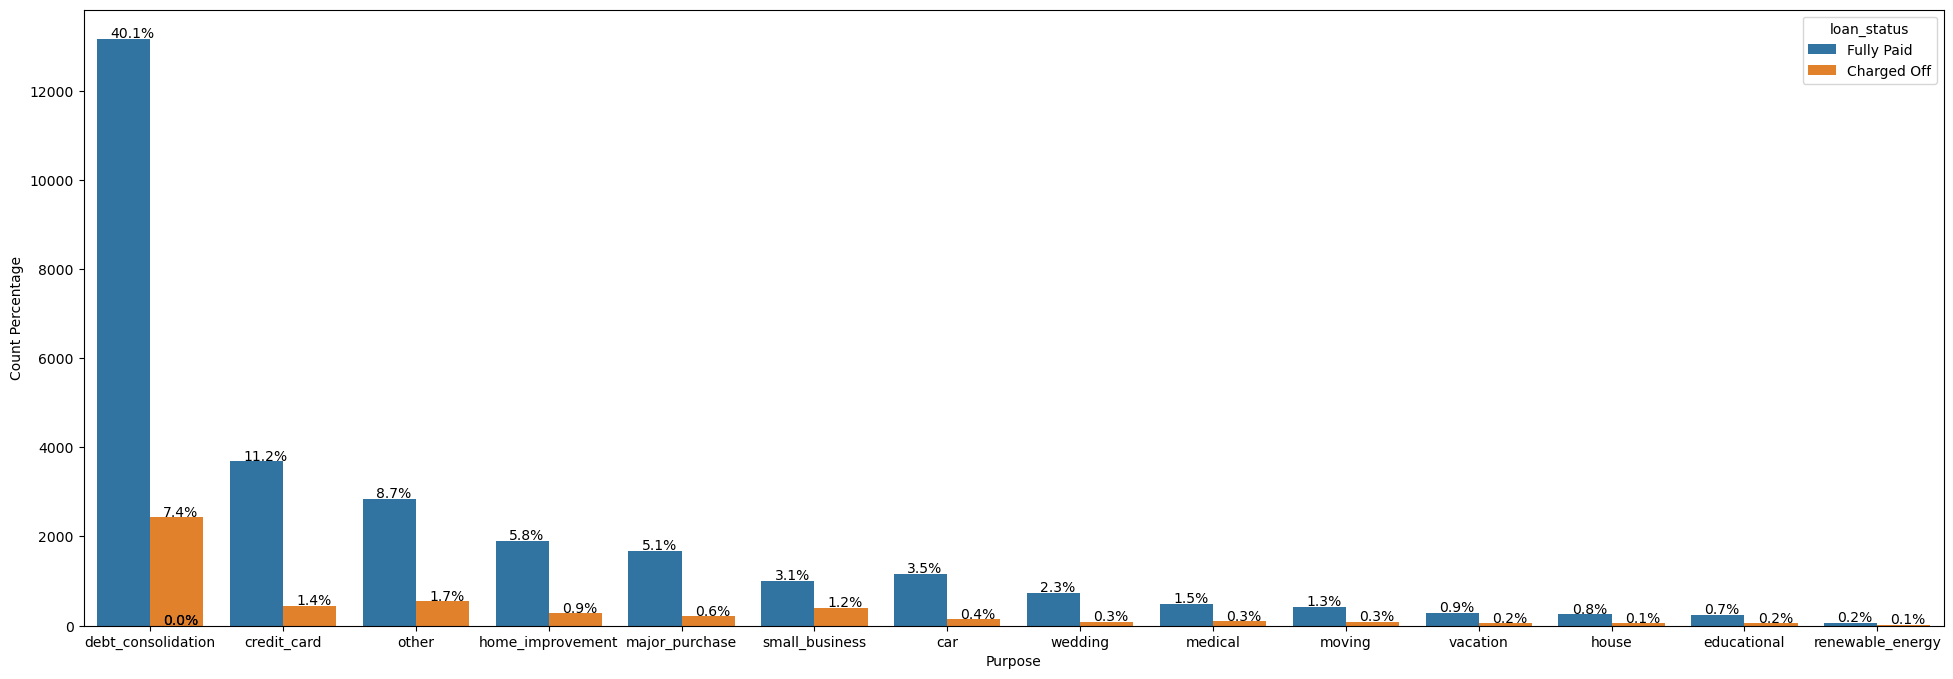

In [88]:
double_compare("purpose", "loan_status", "Purpose", "Count Percentage")

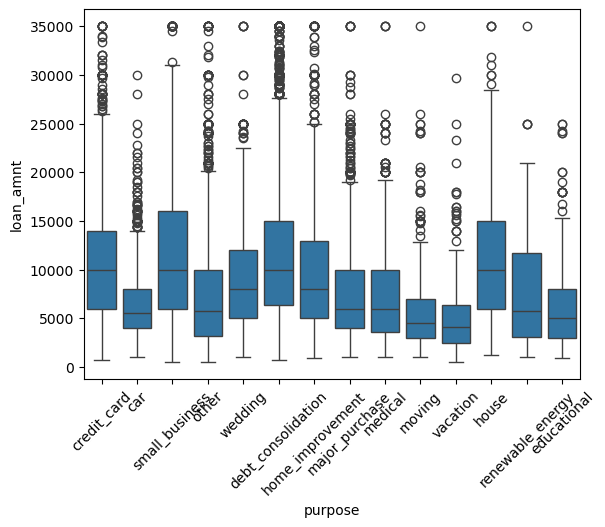

In [89]:
sns.boxplot(x = 'purpose', y = 'loan_amnt', data=df)
plt.xticks(rotation=45)
plt.show()

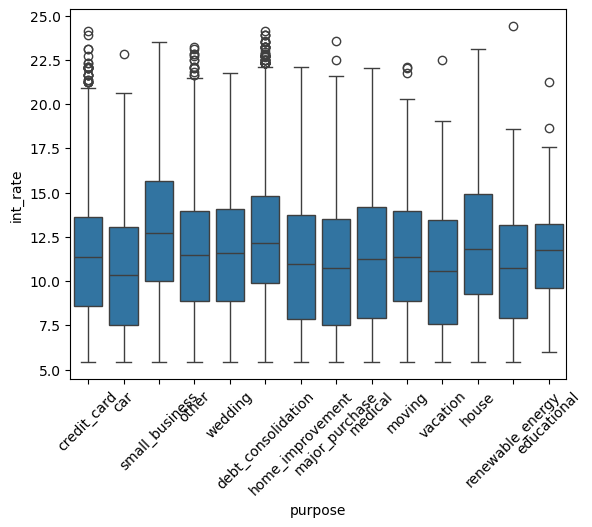

In [90]:
sns.boxplot(x = 'purpose', y = 'int_rate', data=df)
plt.xticks(rotation=45)
plt.show()

It seems that giving loans to the small businesses is riskiest, mainly because not all the small business successfully ran. But their volume is quite low.
On the other hand debt consolidation is riskiest of all with very high volume of charged off borrowers.

#### Loan Term analysis

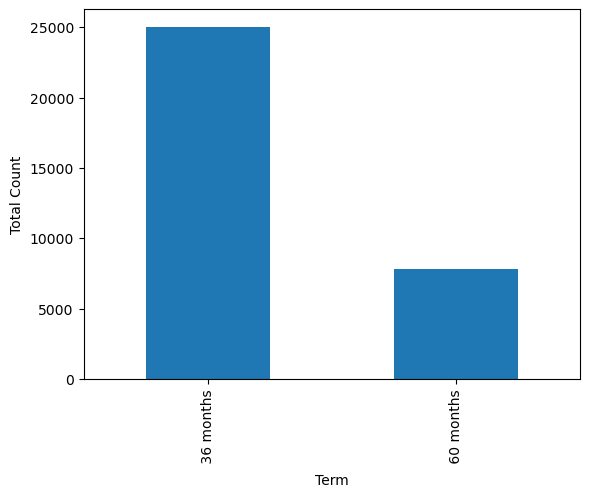

In [91]:
#Univariate and Bivariate analysis for term
df.term.value_counts().plot.bar()
plt.xlabel("Term")
plt.ylabel("Total Count")
plt.show()

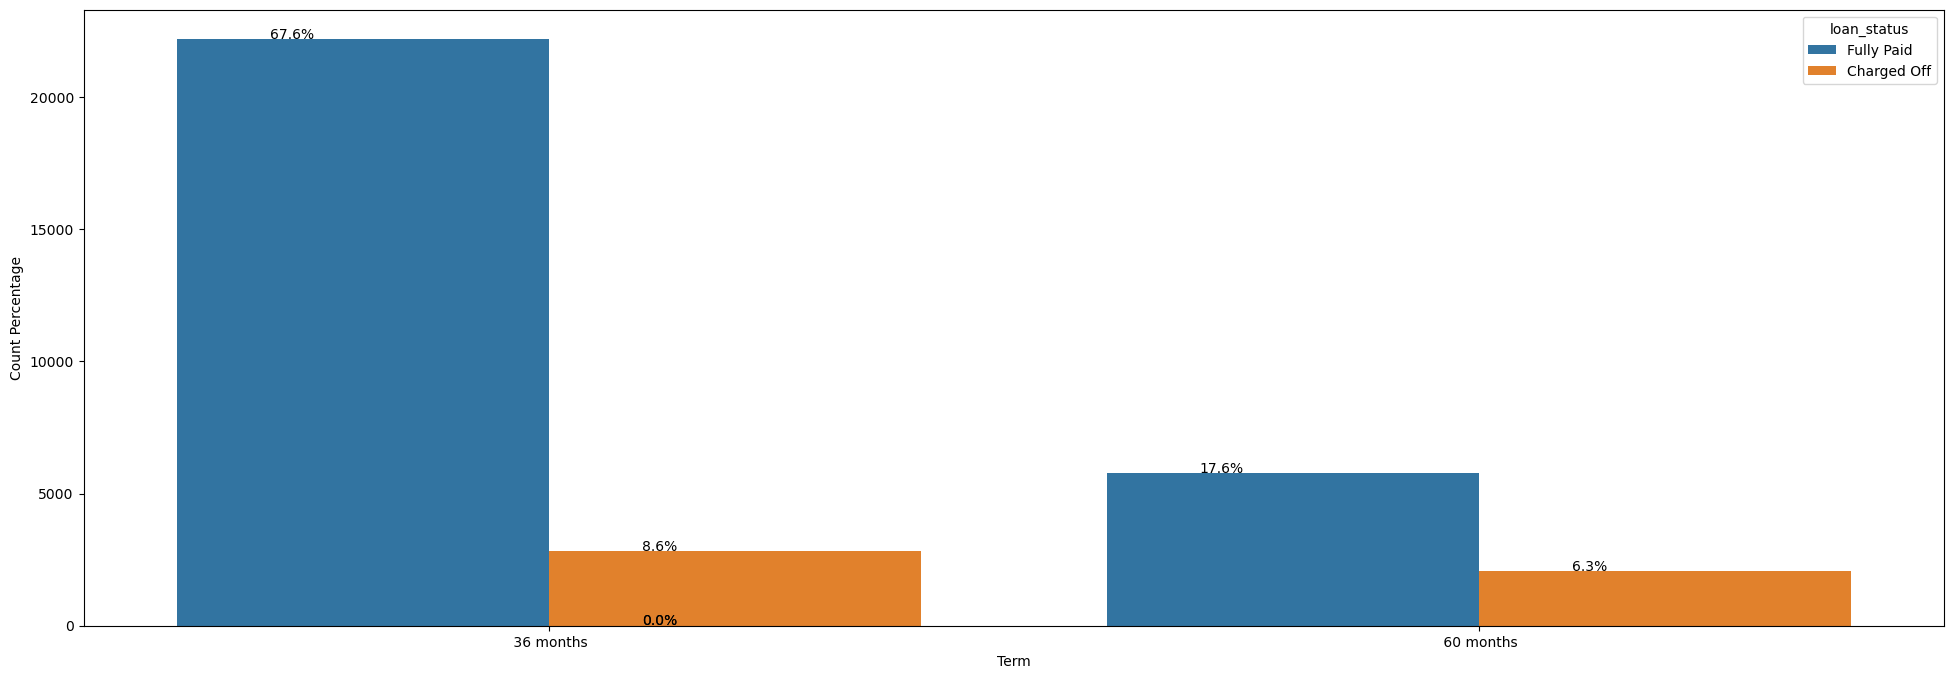

In [92]:
double_compare("term", "loan_status", "Term", "Count Percentage")


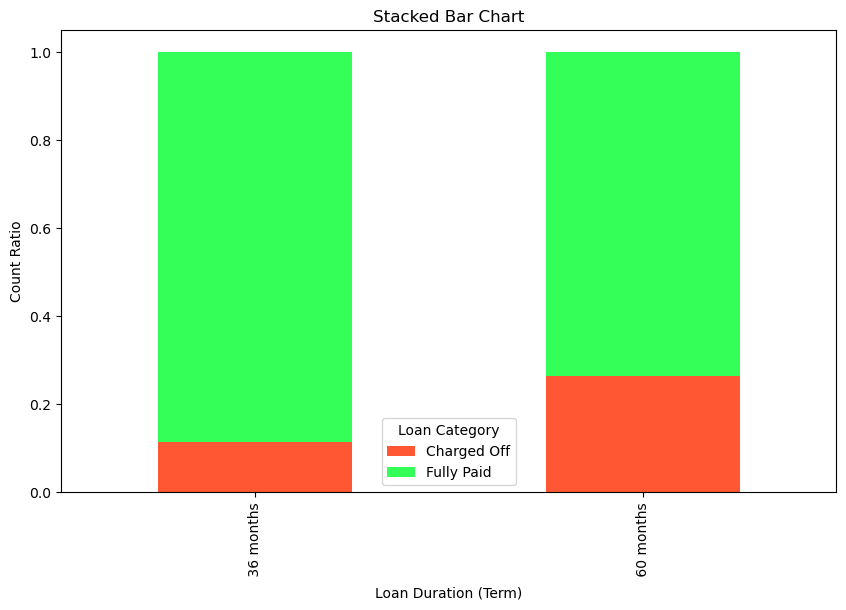

In [93]:
counts = df.groupby(['term', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Loan Duration (Term)')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()


<Axes: xlabel='term', ylabel='loan_amnt'>

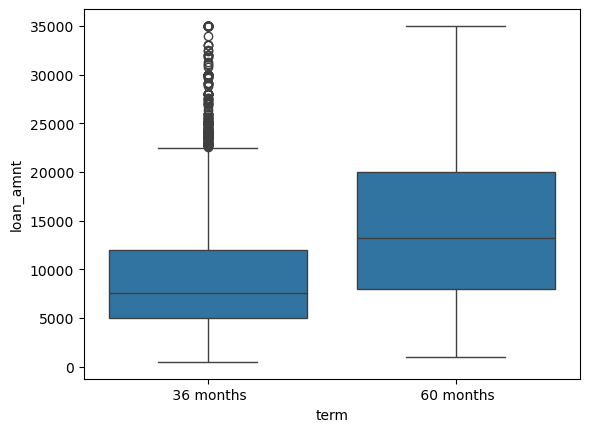

In [94]:
sns.boxplot(x = 'term', y = 'loan_amnt', data=df)


<Axes: xlabel='term', ylabel='int_rate'>

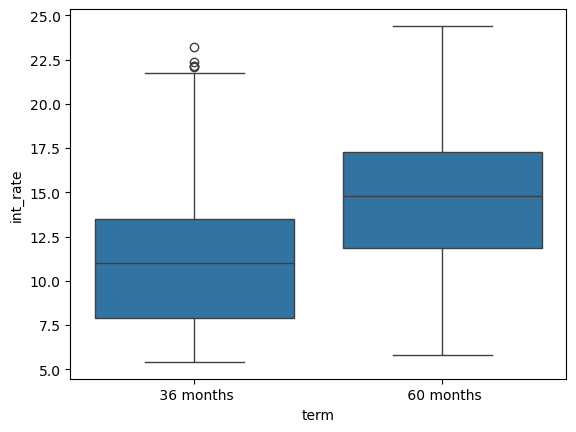

In [95]:
sns.boxplot(x = 'term', y = 'int_rate', data=df)


It seems that the 5 year term period loan are comparitively more charged off (although the volume is less ), maybe because
1. borrowers never intend to pay back the loan in the first place, that's why they took 5 years loan
2. 5 years is a long period of time, hence some unexpected crises can arise, which can disturb the paying back plan.

#### Grade analysis

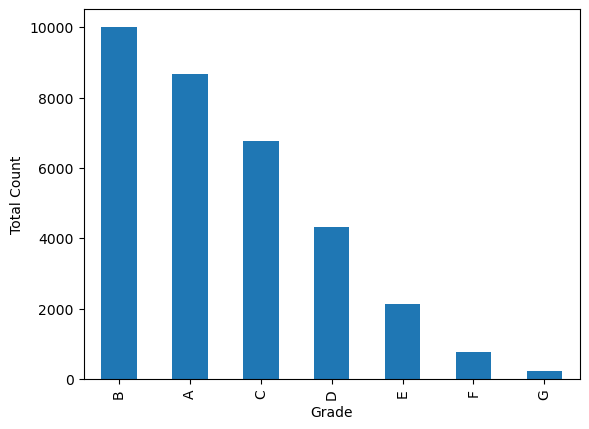

In [96]:
#Univariate and Bivariate analysis for Grade
df.grade.value_counts().plot.bar()
plt.xlabel("Grade")
plt.ylabel("Total Count")
plt.show()

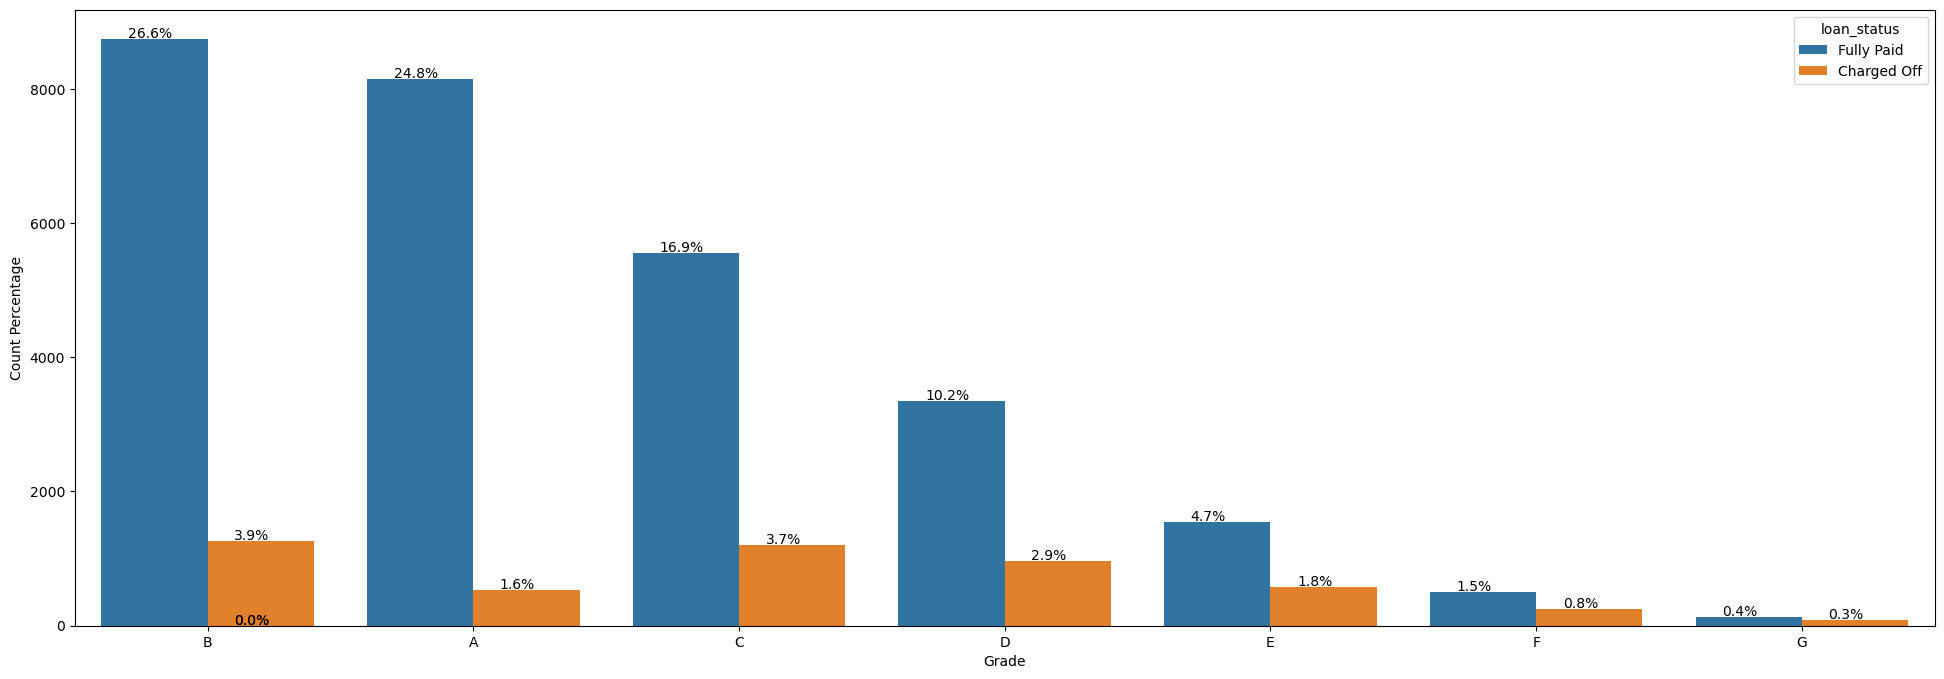

In [97]:
double_compare("grade", "loan_status", "Grade", "Count Percentage")

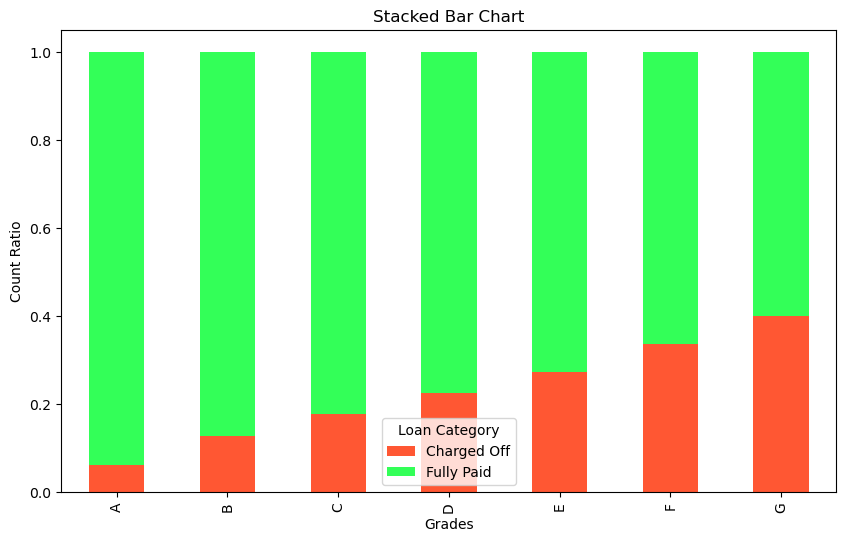

In [98]:
counts = df.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Grades')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()

It seems that A grade loan accounts are comparitively less ratio of charged off borrowers

#### Employee Experience Level analysis

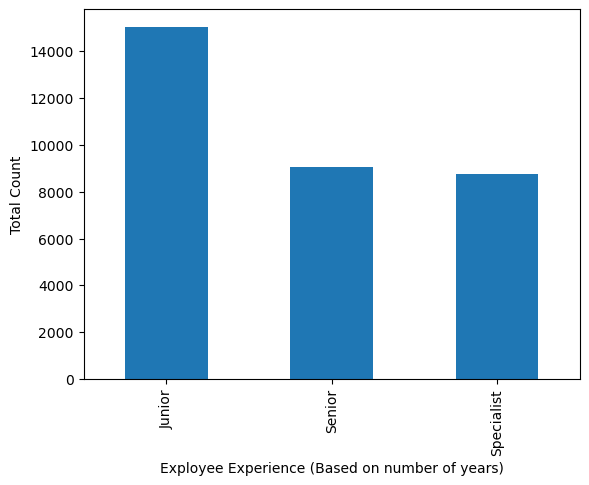

In [99]:
#Univariate and Bivariate analysis for Employee Experience
df.exp_level.value_counts().plot.bar()
plt.xlabel("Exployee Experience (Based on number of years)")
plt.ylabel("Total Count")
plt.show()

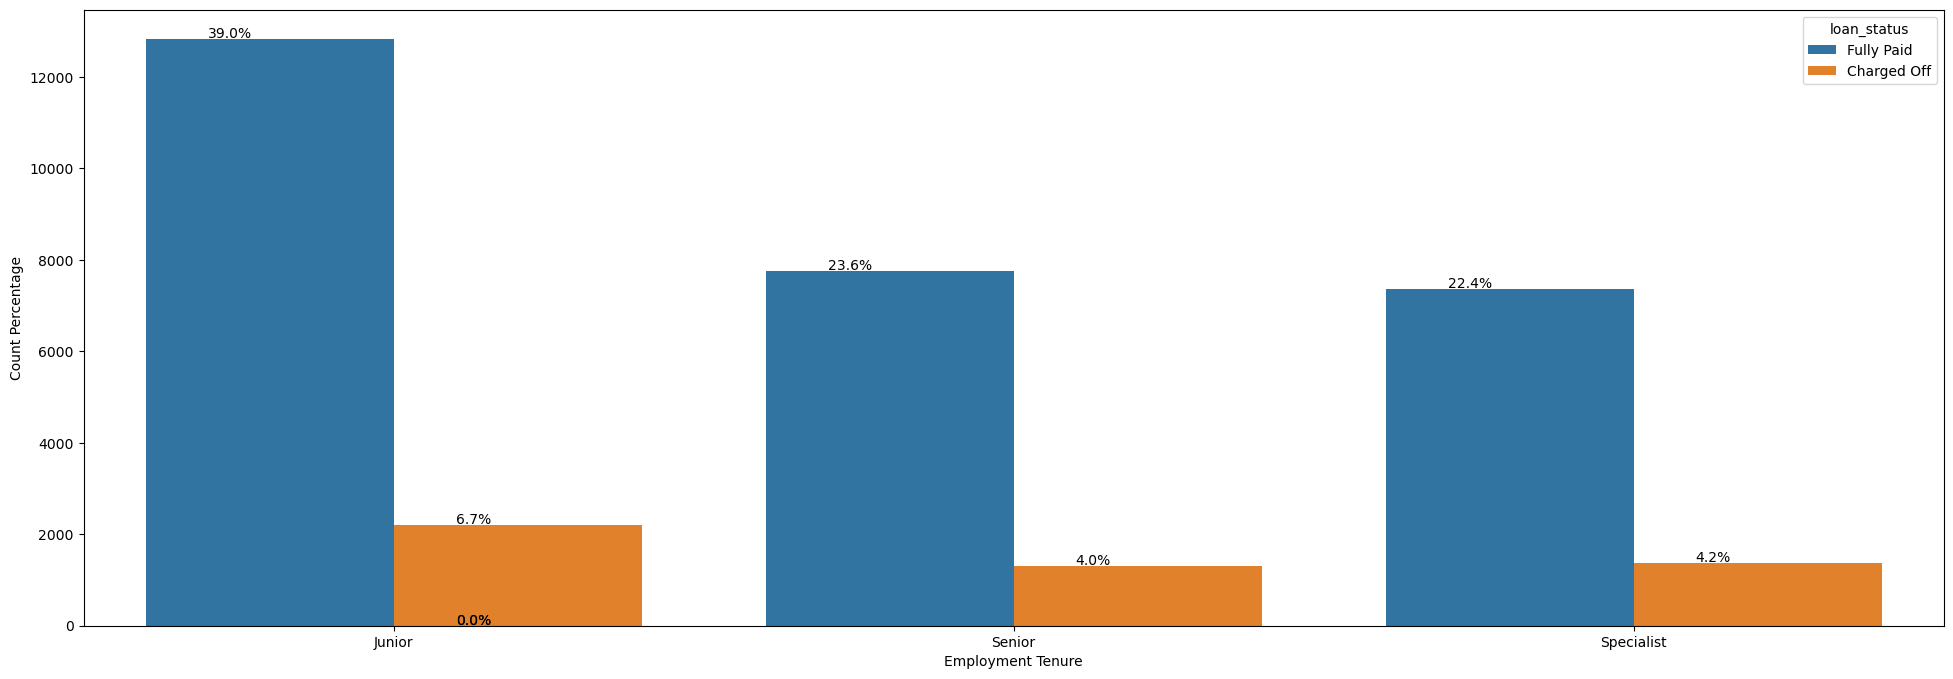

In [100]:
double_compare("exp_level", "loan_status", "Employment Tenure", "Count Percentage")


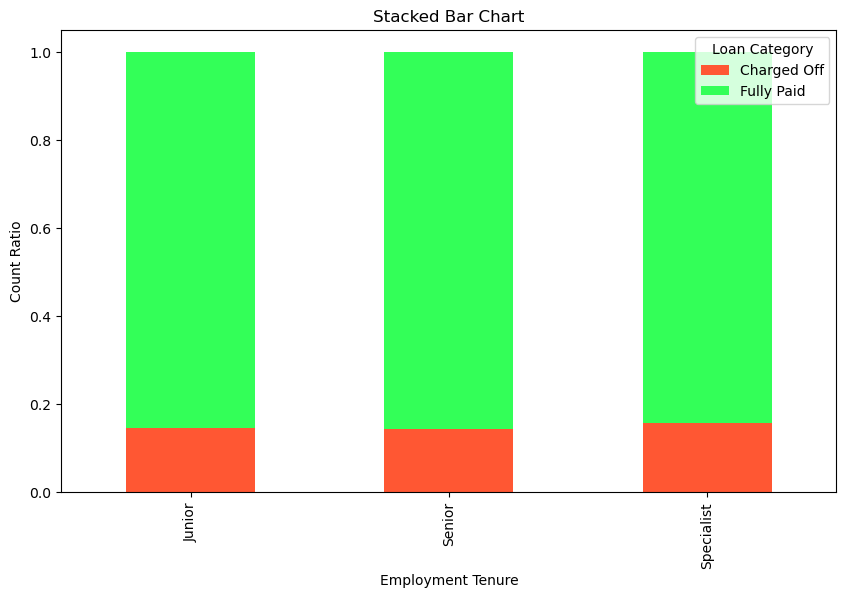

In [101]:

counts = df.groupby(['exp_level', 'loan_status']).size().unstack(fill_value=0)
counts_perc = counts[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(), axis=1)
counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF5733', '#33FF58'])
plt.title('Stacked Bar Chart')
plt.xlabel('Employment Tenure')
plt.ylabel('Count Ratio')
plt.legend(title='Loan Category')
plt.show()

<Axes: xlabel='exp_level', ylabel='loan_amnt'>

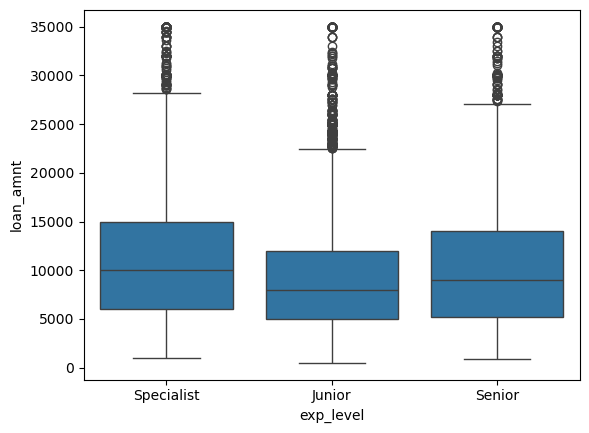

In [102]:
sns.boxplot(x = 'exp_level', y = 'loan_amnt', data=df)


<Axes: xlabel='exp_level', ylabel='int_rate'>

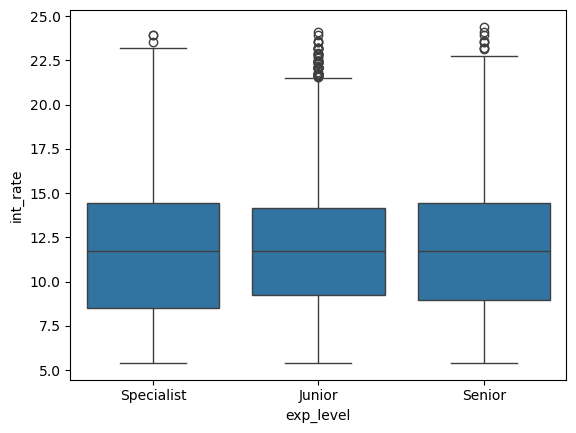

In [103]:
sns.boxplot(x = 'exp_level', y = 'int_rate', data=df)


It seems that the junior employees are the riskiest as their volumne is much high for chargedoff accounts.
On the other hand, Senior employees are comparitively better for fully paying the loan amount.


### Derived Columns' analysis


#### Loan Amount Bucket Analysis


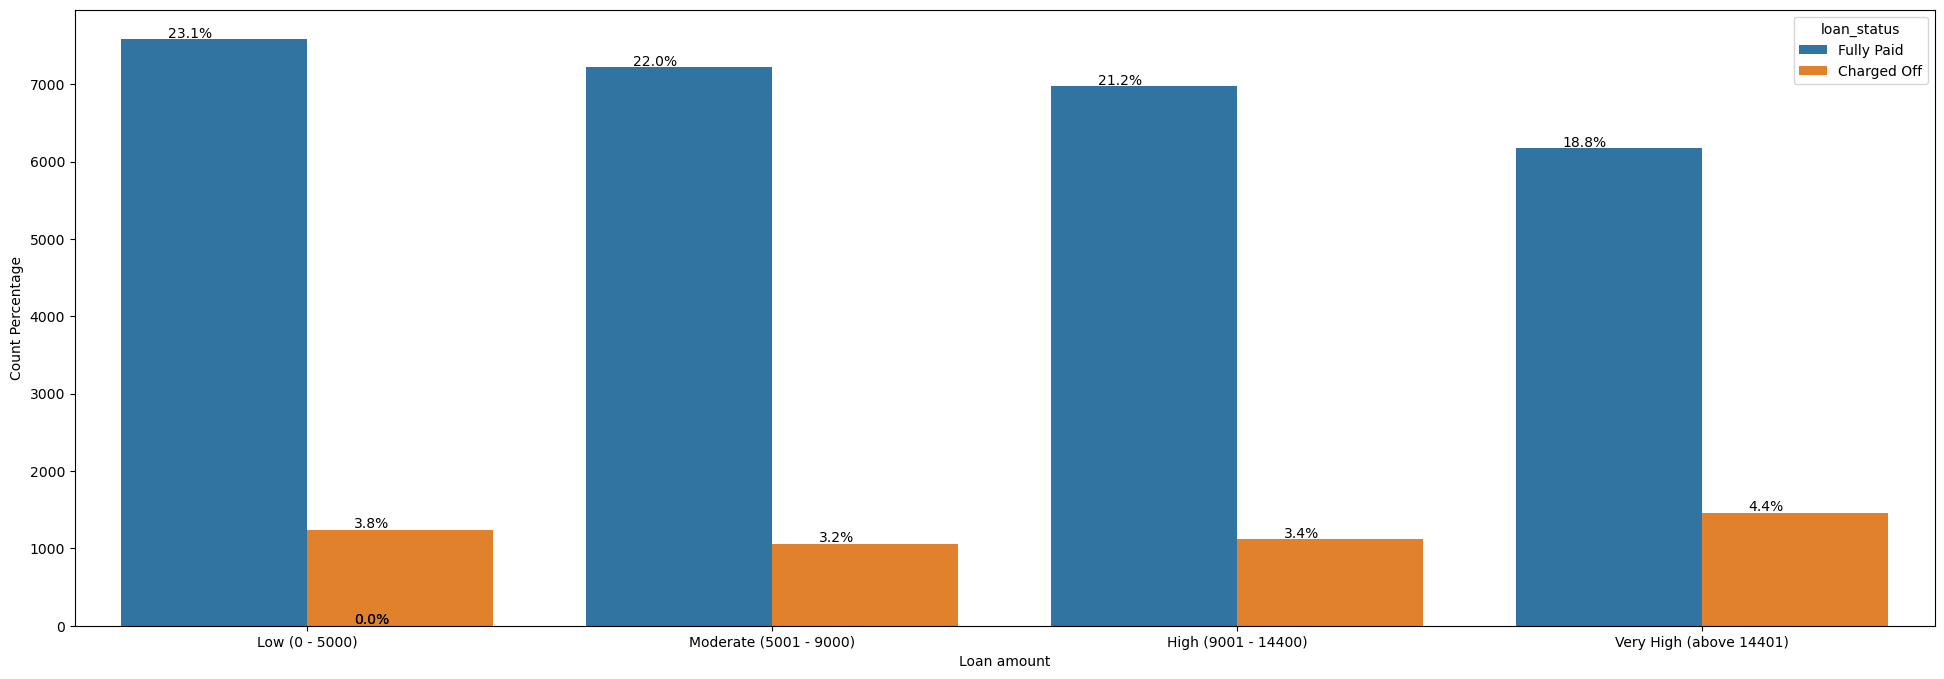

In [104]:

double_compare("loan_amnt_bucket", "loan_status", "Loan amount", "Count Percentage")


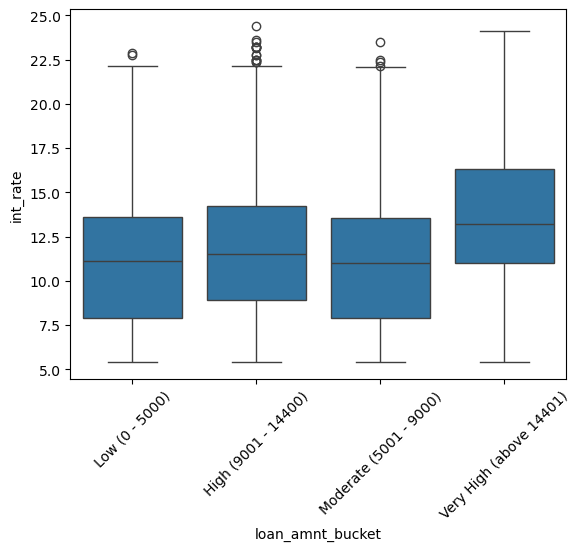

In [105]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'int_rate', data=df)
plt.xticks(rotation=45)
plt.show()

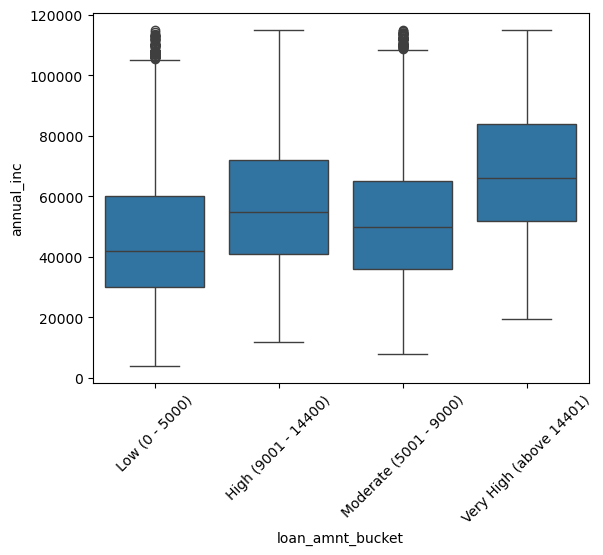

In [106]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'annual_inc', data=df)
plt.xticks(rotation=45)
plt.show()

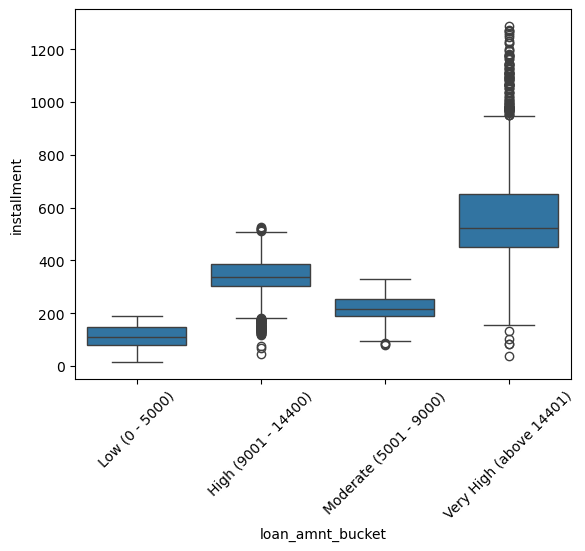

In [107]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'installment', data=df)
plt.xticks(rotation=45)
plt.show()

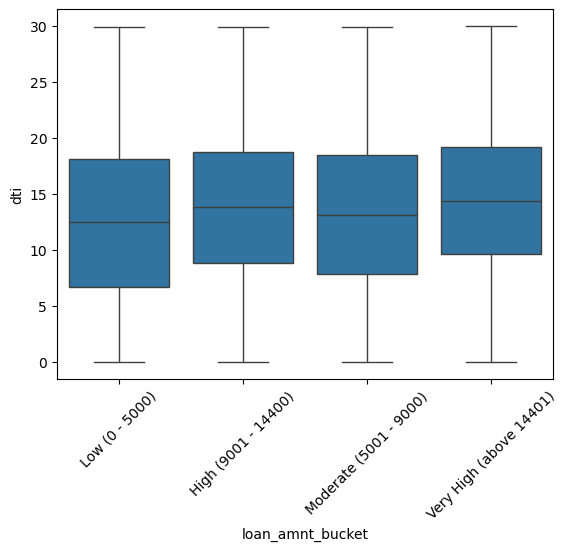

In [108]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'dti', data=df)
plt.xticks(rotation=45)
plt.show()

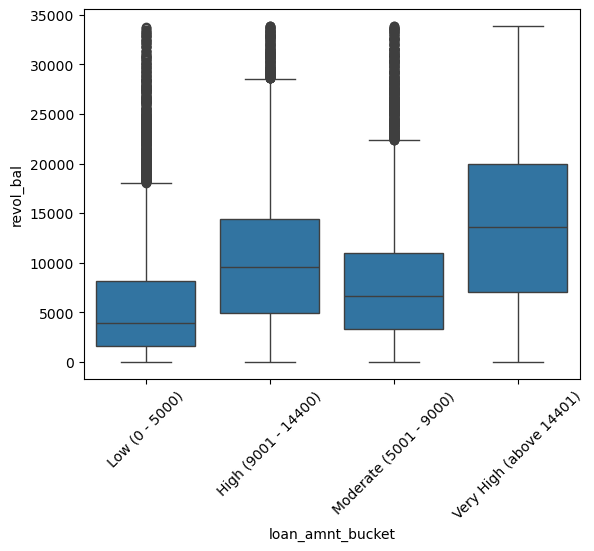

In [109]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'revol_bal', data=df)
plt.xticks(rotation=45)
plt.show()

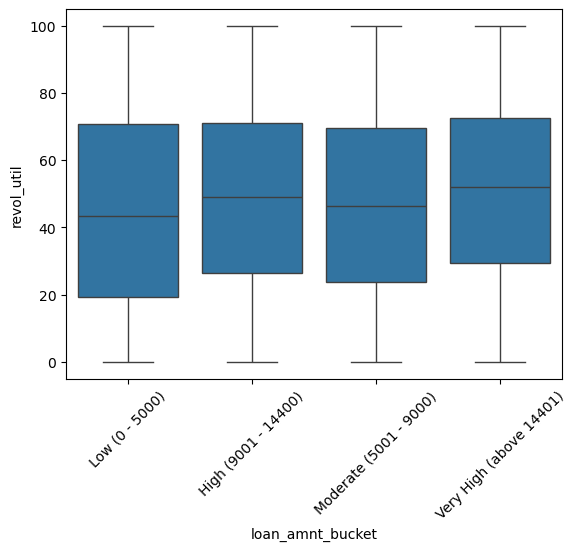

In [110]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'revol_util', data=df)
plt.xticks(rotation=45)
plt.show()

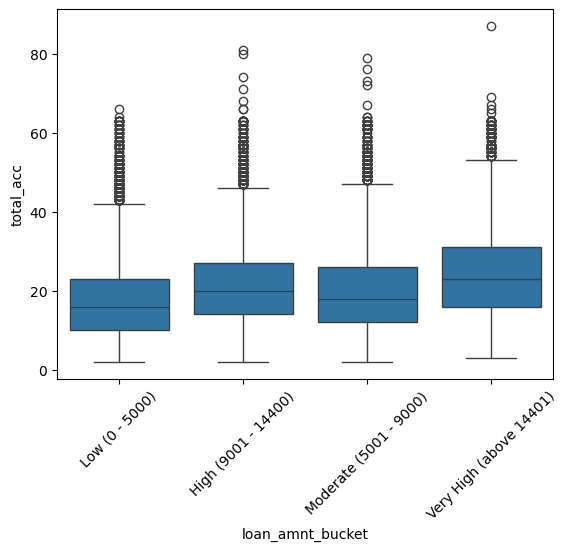

In [111]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'total_acc', data=df)
plt.xticks(rotation=45)
plt.show()

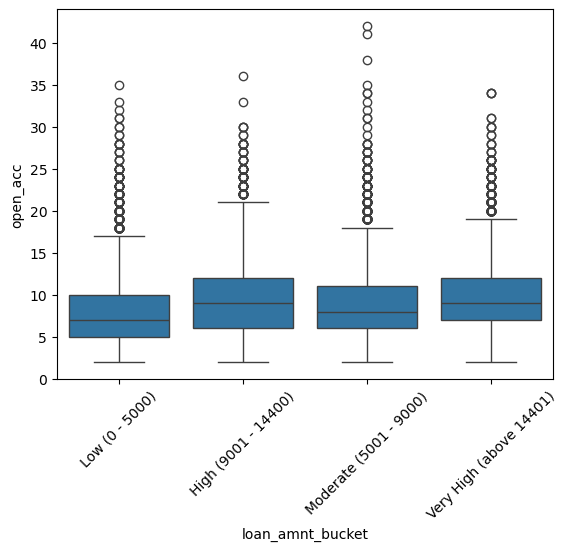

In [112]:
sns.boxplot(x = 'loan_amnt_bucket', y = 'open_acc', data=df)
plt.xticks(rotation=45)
plt.show()

It seems that borrowers, with very high income and total revolving balance, usually takes very high loan amount, but the risk also increases.
As sometimes, very high borrowers might leave the country thus causing very large loss to the bank.
However, comparatively the moderate and high loan amount borrowers are less charged off.


#### Annual Income Bucket Analysis


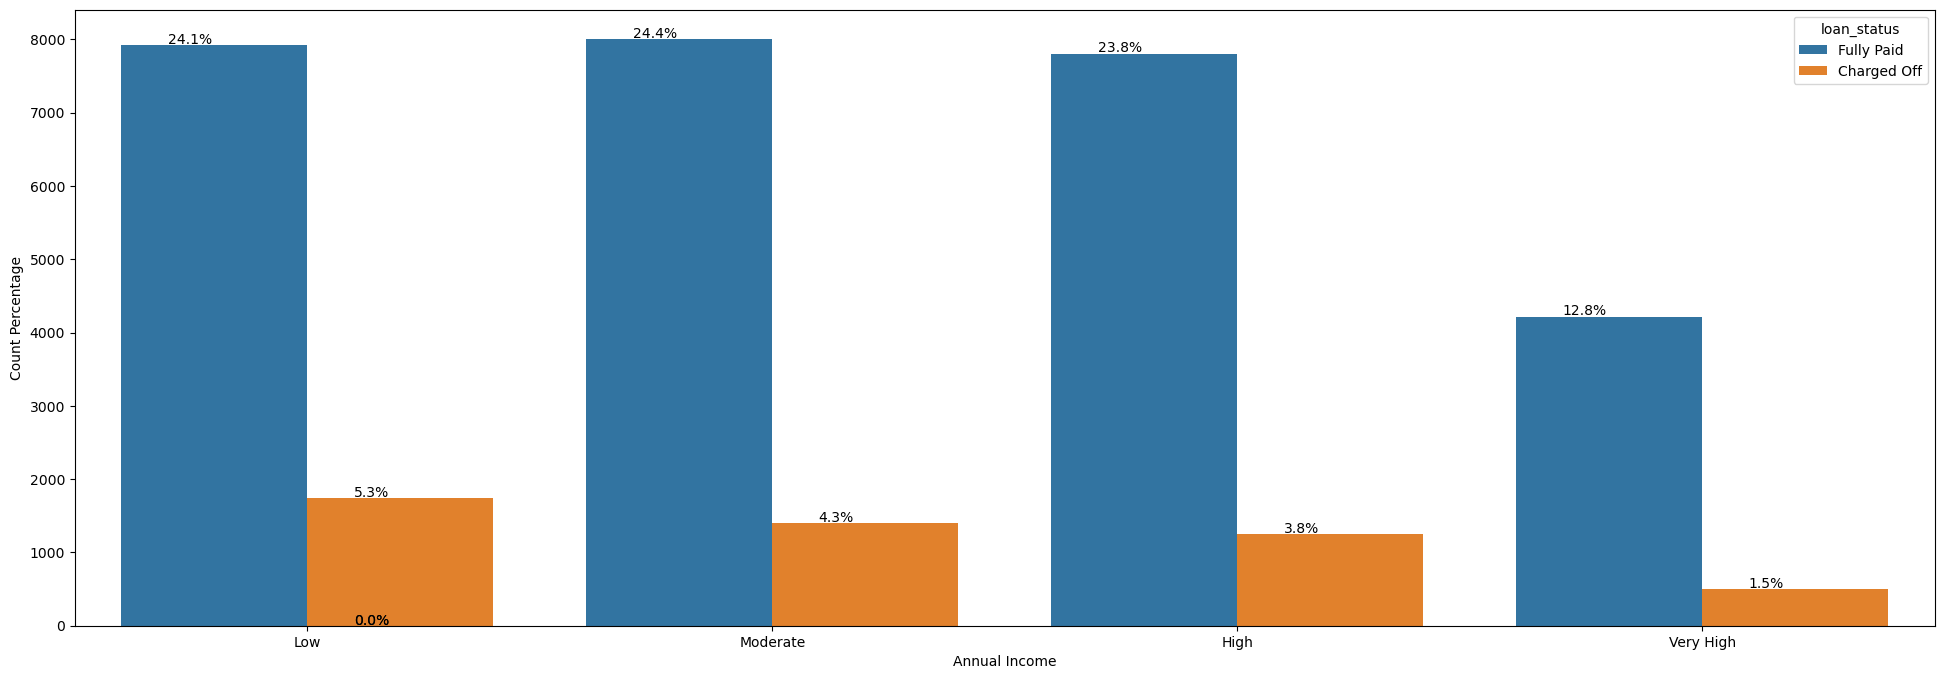

In [113]:

#Bivariate analysis for Annual Income
double_compare("annual_inc_bucket", "loan_status", "Annual Income", "Count Percentage")


<Axes: xlabel='annual_inc_bucket', ylabel='total_acc'>

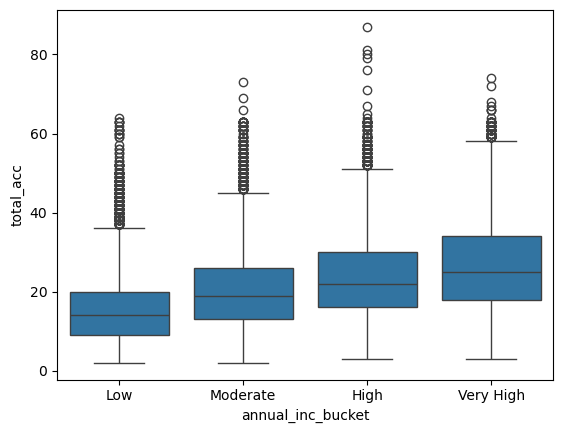

In [114]:


sns.boxplot(x = 'annual_inc_bucket', y = 'total_acc', data=df)

<Axes: xlabel='annual_inc_bucket', ylabel='dti'>

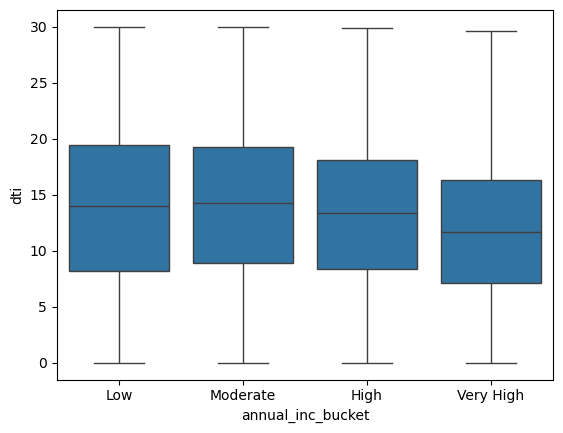

In [115]:


sns.boxplot(x = 'annual_inc_bucket', y = 'dti', data=df)

It seems that the borrowers with very high annual income:
1. tend to have low DTI
2. hence they are able to pay off loan easily even after having multiple loan accounts.

On the other hand
1. very low income borrowers are the riskiest


#### Int Rate Bucket Analysis


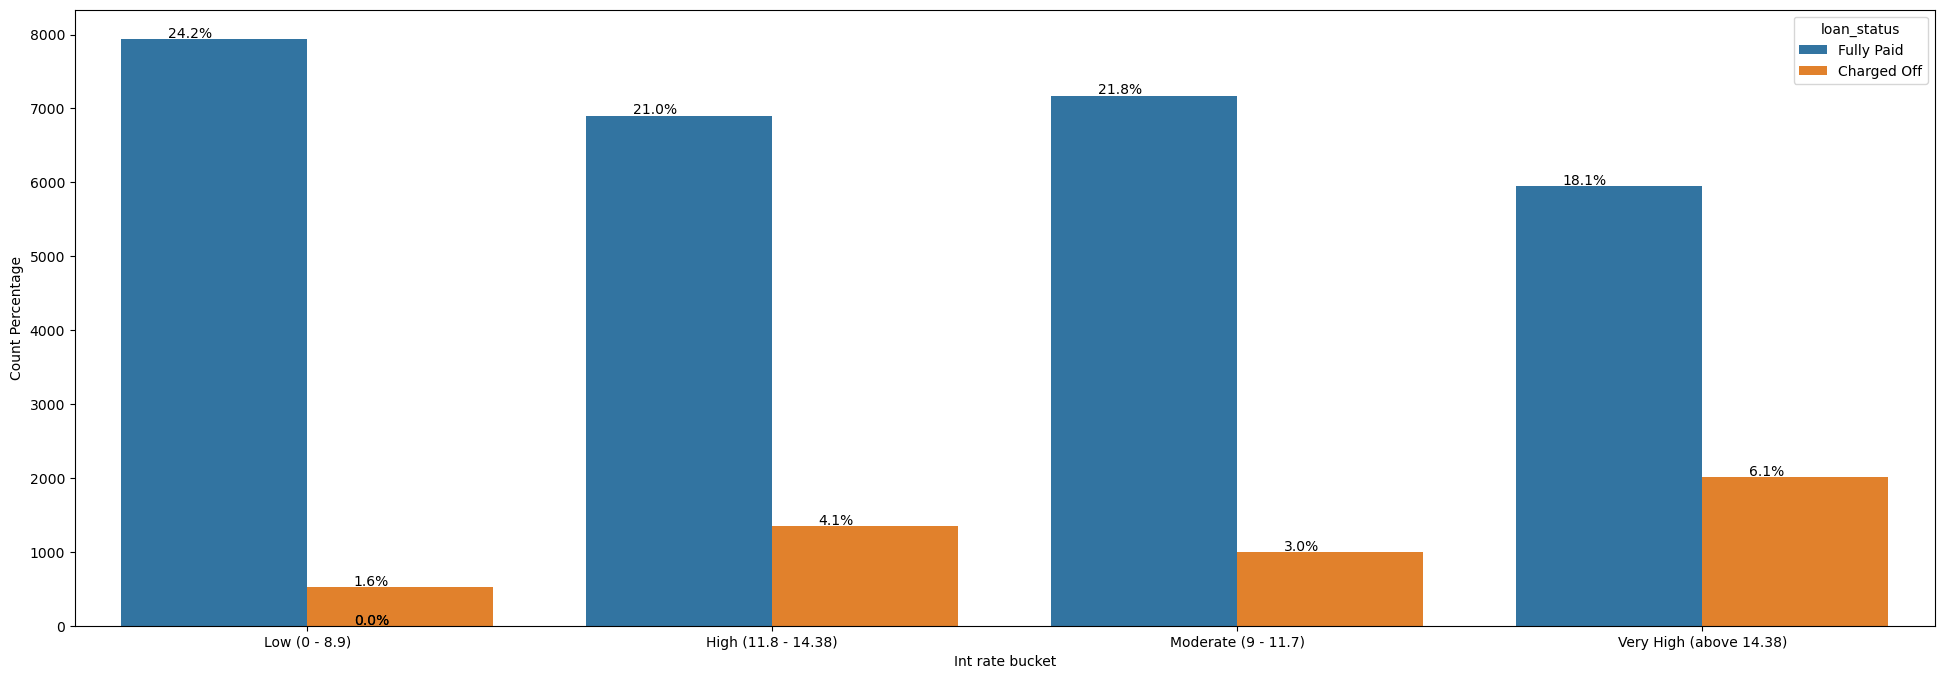

In [116]:
double_compare("int_rate_bucket", "loan_status", "Int rate bucket", "Count Percentage")


This means that very high interest rate loan accounts are likely to charged off

#### DTI Bucket Analysis


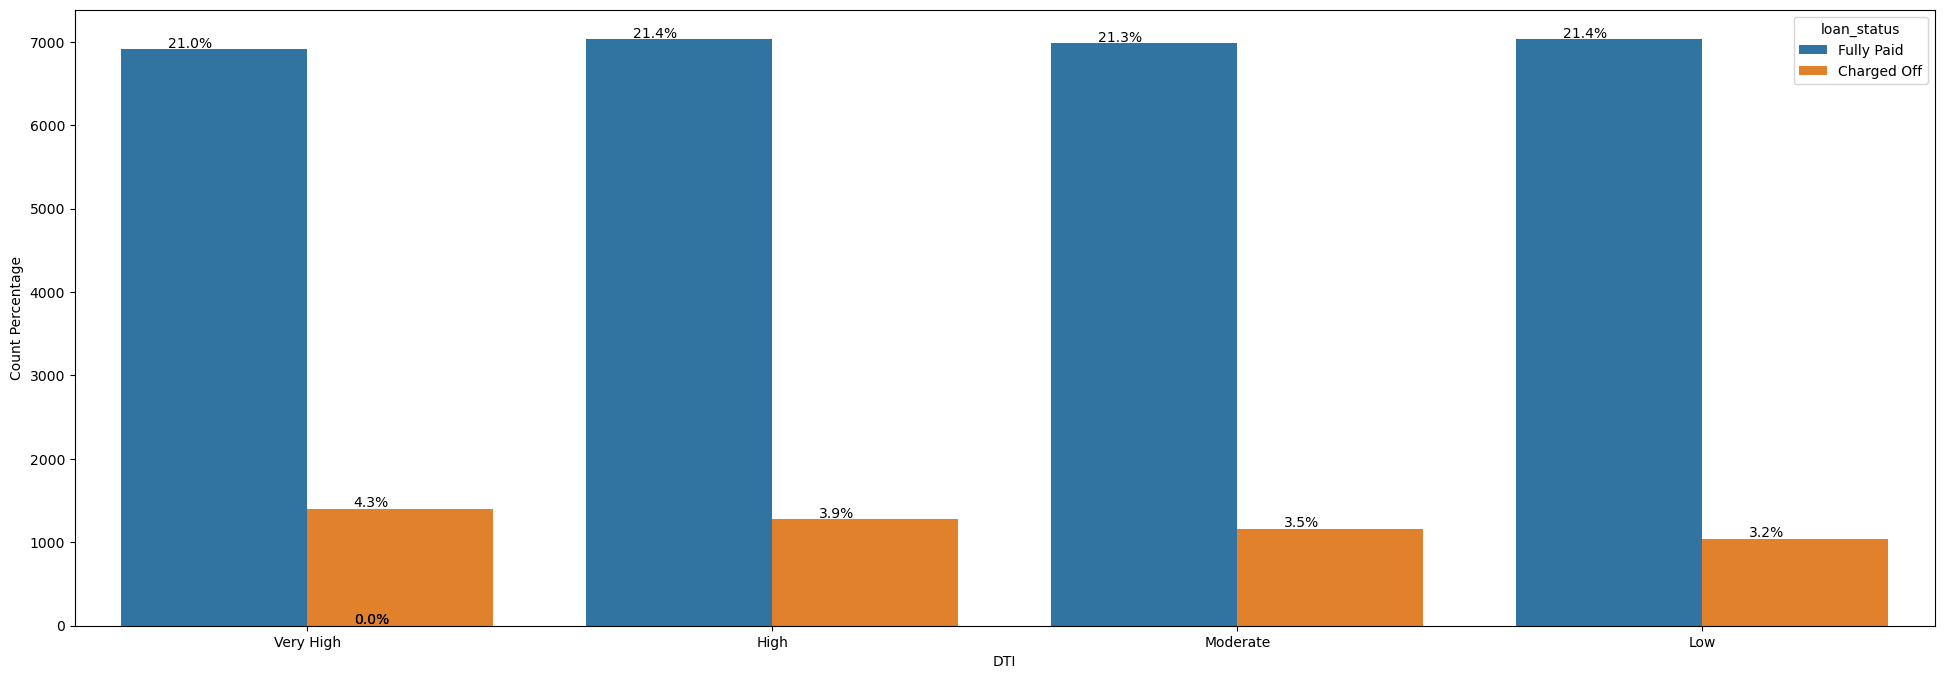

In [117]:

#Bivariate analysis for DTI

double_compare("dti_bucket", "loan_status", "DTI", "Count Percentage")


This proves the above point, that people with very high DTI, tend to be more charged off

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32847 entries, 0 to 38576
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               32847 non-null  int64         
 1   funded_amnt             32847 non-null  int64         
 2   funded_amnt_inv         32847 non-null  float64       
 3   term                    32847 non-null  object        
 4   int_rate                32847 non-null  float64       
 5   installment             32847 non-null  float64       
 6   grade                   32847 non-null  object        
 7   sub_grade               32847 non-null  object        
 8   emp_length              32847 non-null  int64         
 9   home_ownership          32847 non-null  object        
 10  annual_inc              32847 non-null  float64       
 11  verification_status     32847 non-null  object        
 12  issue_d                 32847 non-null  datetime64[

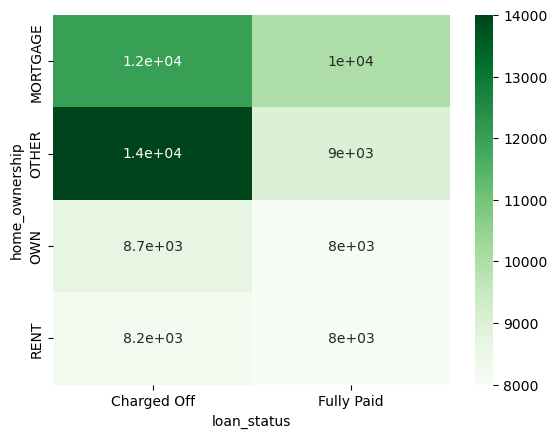

In [119]:
#Multi variate analysis using heatmap

res = pd.pivot_table(data=df,index="home_ownership",columns="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

It seems that the other home ownership category has the highest charged off avg loan amount

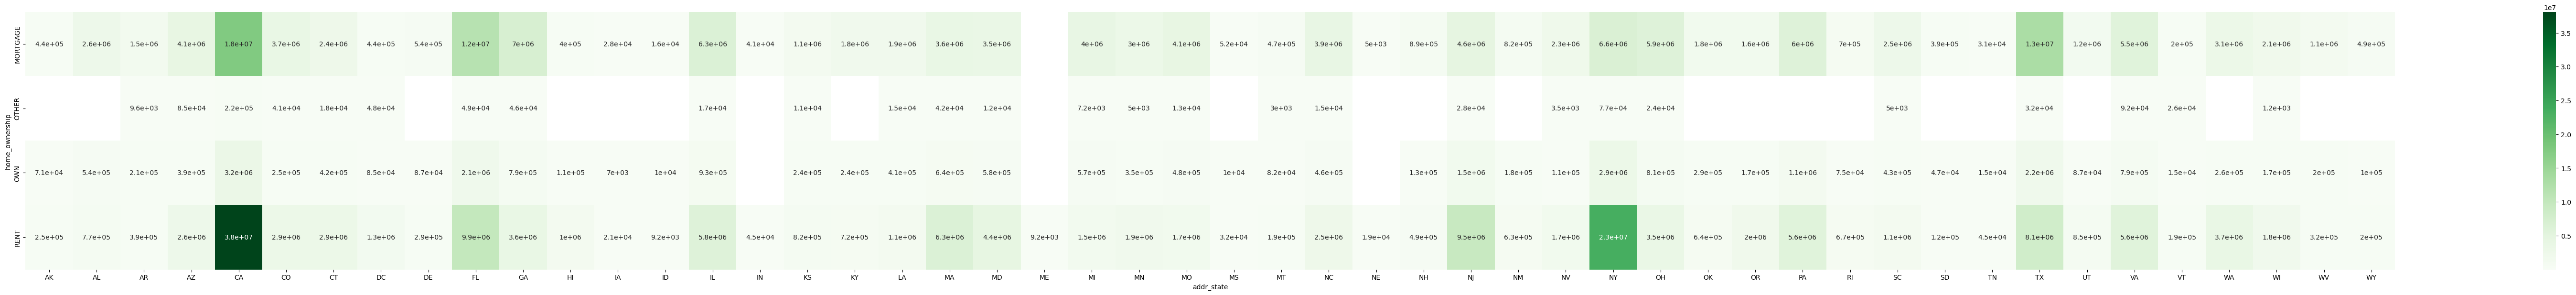

In [120]:
#Multi variate analysis using heatmap
res = pd.pivot_table(data=df,index="home_ownership",columns="addr_state",values="loan_amnt",aggfunc=lambda x: np.sum(x))
plt.figure(figsize=(80, 7))
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

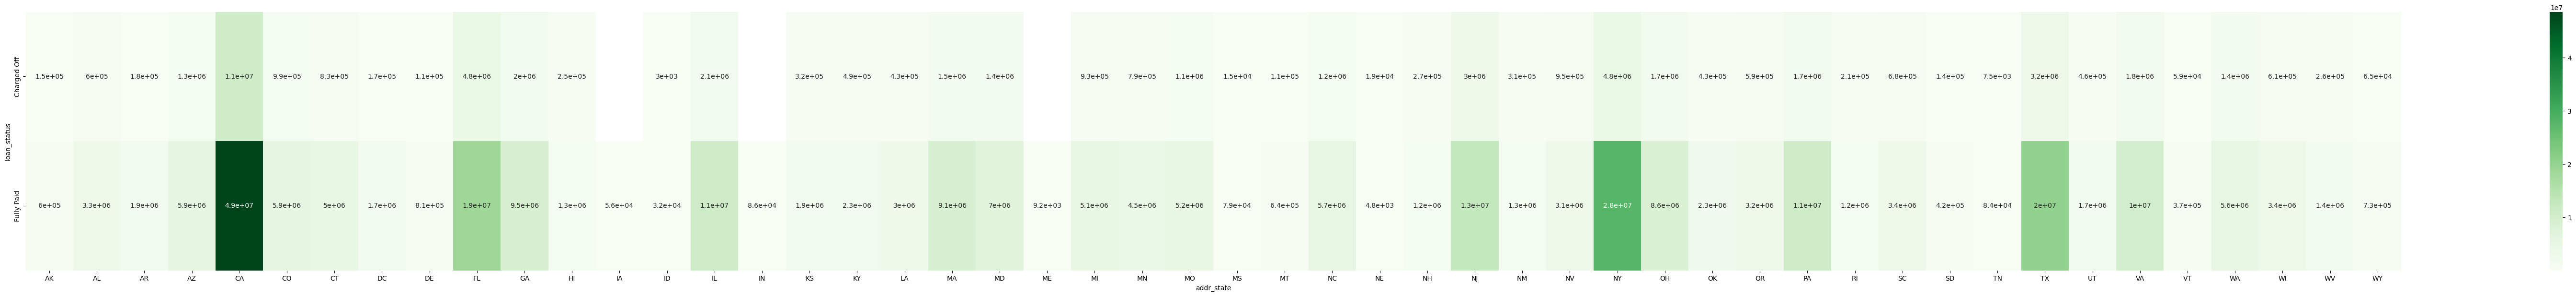

In [121]:
#Multi variate analysis using heatmap
res = pd.pivot_table(data=df,index="loan_status",columns="addr_state",values="loan_amnt",aggfunc=lambda x: np.sum(x))
plt.figure(figsize=(80, 7))
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

It seems that the borrowers living in RENT facility in CA state takes the highes amount of loan, 
They have highest fully paid accounts, and also are having highest charged off accounts as well

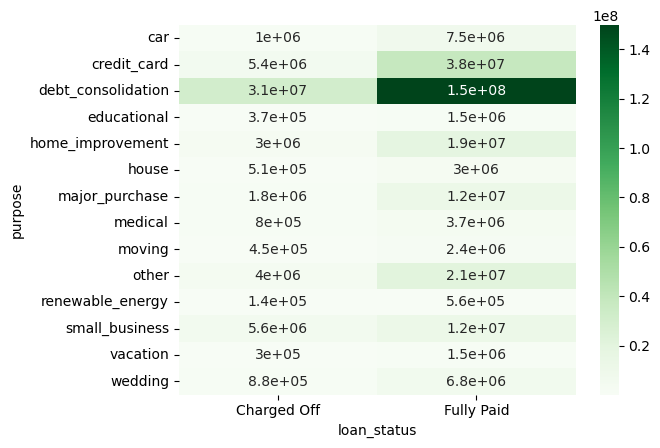

In [122]:
#Multi variate analysis using heatmap
res = pd.pivot_table(data=df,index="purpose",columns="loan_status",values="loan_amnt",aggfunc=lambda x: np.sum(x))
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

This confirms our previous analysis of debt consolidation is riskiest of all with very high volume of charged off borrowers and also very high fully paid accounts.


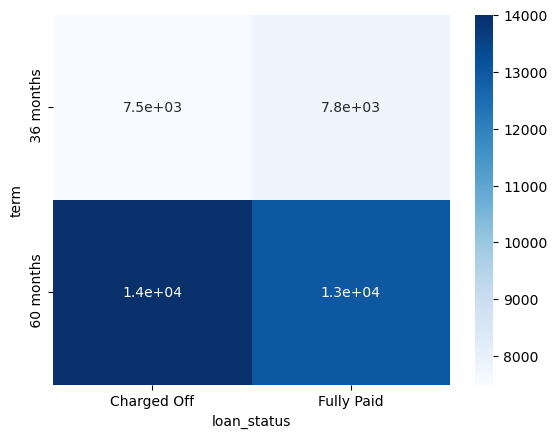

In [123]:
#Multi variate analysis using heatmap
res = pd.pivot_table(data=df,index="term",columns="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
sns.heatmap(res, cmap = "Blues", annot=True)
plt.show()

It seems that charged off is most for 60 month tenure loans


<Figure size 500x800 with 0 Axes>

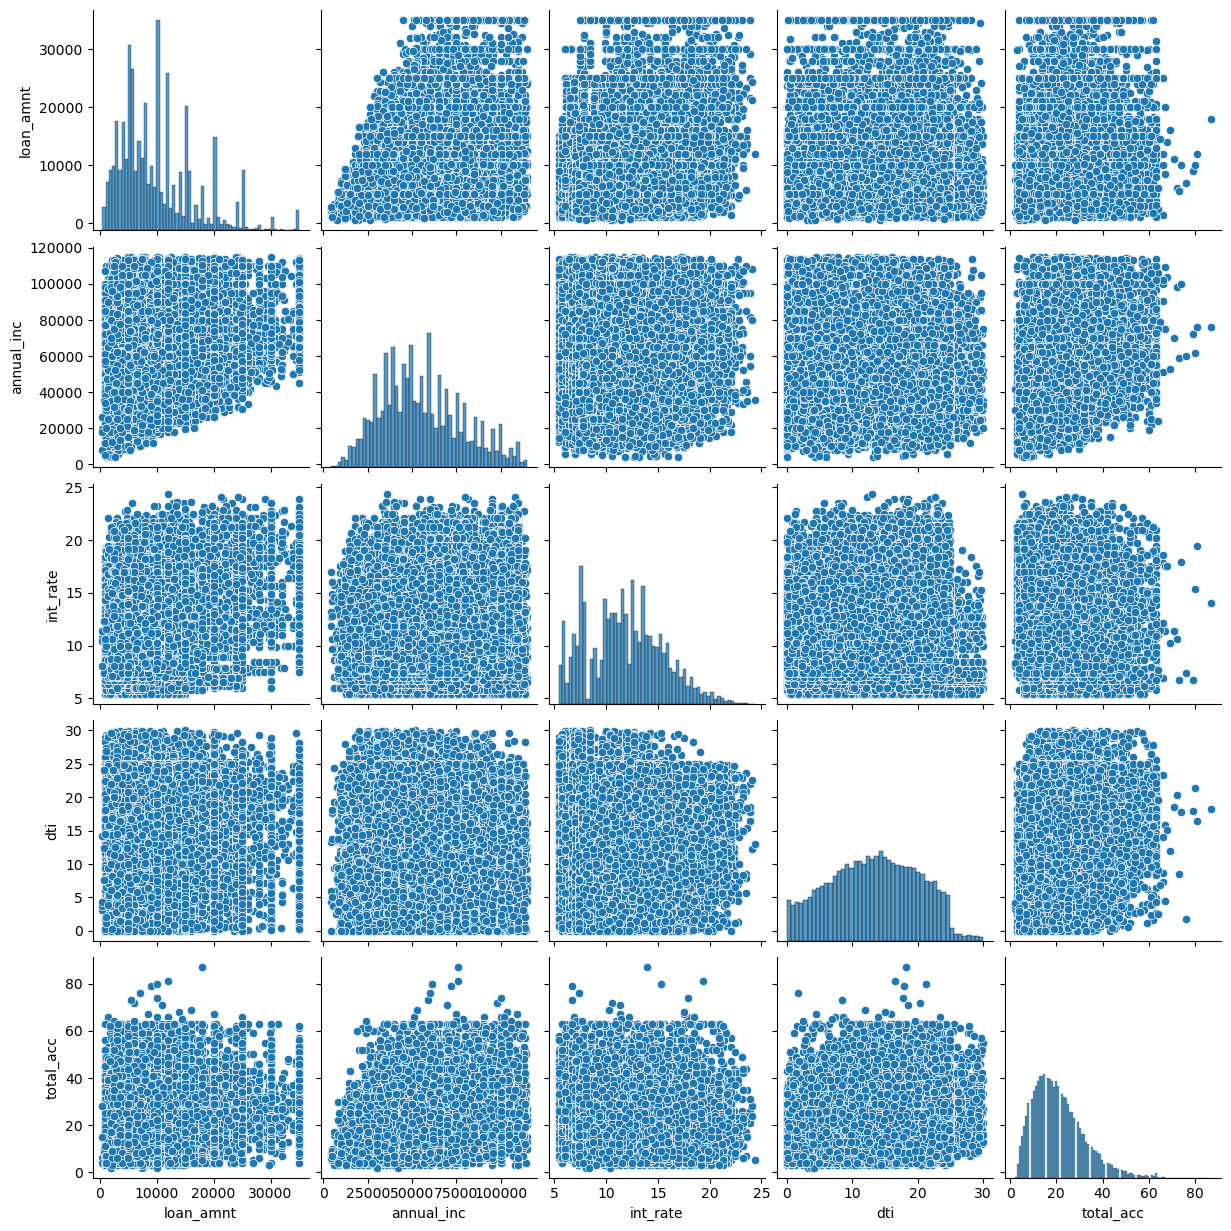

In [124]:
#Multi variate analysis using pairplot
plt.figure(figsize=(5,8))
sns.pairplot(df[['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'total_acc']])
plt.show()